# จัดทำโดย
- กันตวรรณ โรจนสิต 60427163
- บุษราณี นนนที 6042816426
- ภัทราวดี รัชตะกิตติสุนทร 6042870226
- วิชชา ทยานุวัฒน์ 604290272



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import IFrame
import ipywidgets as widgetsfrom
from ipywidgets import interact,interactive
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FuncFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
    
%matplotlib inline
%config InlineBackend.figure_format='retina'


In [8]:
@interact(x = (-5, 5), y = '2', z  = ['4', '5', '6'])
def square(x = 0, y = '0', z ='4'):
    y = float(y)
    print(x ** 2)
    print(f'{y}:{y**2}')
    print(z)

interactive(children=(IntSlider(value=0, description='x', max=5, min=-5), Text(value='2', description='y'), Dr…

In [2]:
pd.options.display.max_rows = 20
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 1000

#แสดงให้มีค่า format แบบมีลูกน้ำขั้น
pd.options.display.float_format = '{:,.2f}'.format

#ตั้งค่ารูปแบบกราฟ
sns.set_style(style='whitegrid')

# โต๊ะจีน 1,250 โต๊ะ เลี้ยงนักท่องเที่ยวจีน ข้าวเหนียวมะม่วงใหญ่สุดในโลก!"

In [3]:
IFrame('https://www.khaosod.co.th/breaking-news/news_2112601', width=1000, height=400)

จากข่าว "โต๊ะจีน 1,250 โต๊ะ เลี้ยงนักท่องเที่ยวจีน ข้าวเหนียวมะม่วงใหญ่สุดในโลก!" ข้างต้น จะเห็นได้ว่า ประเทศไทยให้ความสำคัญกับความสัมพันธ์ระหว่างประเทศไทย-จีนเป็นอย่างมาก อันเรียกได้ว่า ประเทศจีนเปรียบเสมือนมหามิตรของเราเลยเดียว ทำให้นักท่องเที่ยวจากจีนหลั่งไหลเข้ามาอย่างไม่ขาดสาย และกลายมาเป็นแหล่งรายได้หลักของไทยในด้านการท่องเที่ยวเลยก็ว่าได้

# fuction ต่างๆที่สร้างขึ้นมาใหม่

## set_name_title_x_y(df,title_name,name_x,name_y,font_size) 
- การตั้งค่าแกน x แกน y 

In [4]:
def set_name_title_x_y(df,title_name,name_x,name_y,font_size):
    df.set_title(title_name, size=(font_size*1.5));
    plt.xlabel(name_x, fontsize=font_size,)
    plt.ylabel(name_y, fontsize=font_size);

    # กำหนดลักษณะของข้อความแกน x
    plt.xticks(color='grey', rotation=45, fontweight='bold', fontsize=font_size-5, horizontalalignment='right');


## read_html(url)
- การอ่านไฟล์ html แล้วเก็บค่า df เป็น list

In [5]:
# อ่านไฟล์แล้วเก็บของมูลเป็น list
def read_html(url):
    df_list = []
    for i in url:
        i = pd.read_html(url[i])
        i = i[0]
        df_list.append(i)
        
    return df_list


## get_stock_df(df_list)
- การดึงค่าจากลิสออกมาเพื่อเชื่อมทุกข้อมูลเป็นตารางเดียวกัน

In [6]:
def get_stock_df(df_list):
    df = df_list[0]
    for i in range(1,len(df_list)):
        df_new = df_list[i]
        df = pd.concat([df,df_new])
    return df

## change_date_column(df,col_name)
- จัดการกับ Date column

In [7]:
def change_date_column(df,col_name):
    # เปลี่ยนคอลัมน์ Date
    df['Date'] = pd.to_datetime(df[col_name], dayfirst=True)
    df = df.sort_values('Date')

    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['Week'] = df['Date'].dt.week
    return df


# ข้อมูลจำนวนนักท่องเที่ยว และ ข้อมูลรายได้จากนักท่องเที่ยว

In [8]:
no_tourist_url = 'https://www.dropbox.com/s/jzxpc7wdwtspnc2/%E0%B8%88%E0%B8%B3%E0%B8%99%E0%B8%A7%E0%B8%99%E0%B8%99%E0%B8%B1%E0%B8%81%E0%B8%97%E0%B9%88%E0%B8%AD%E0%B8%87%E0%B9%80%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B8%A2%E0%B8%A7.xlsx?dl=1'
no_tourist = pd.read_excel(no_tourist_url,skiprows=3, skipfooter=3)

In [9]:
#unpivot data

no_tourist_m = pd.melt(no_tourist, id_vars=['continent','Country'] , var_name= 'Year', value_name='person')
no_tourist_m['person'] = pd.to_numeric(no_tourist_m['person'],errors='coerce') #เปลี่ยนtype ให้เป็นตัวเลข

In [10]:
#pivot data

no_tourist_p = no_tourist_m.pivot_table(index = 'Year',columns='Country',values='person')

In [11]:
rev_tourist_url = 'https://www.dropbox.com/s/2u4cvwkihcffjs1/%E0%B8%A3%E0%B8%B2%E0%B8%A2%E0%B9%84%E0%B8%94%E0%B9%89%E0%B8%99%E0%B8%B1%E0%B8%81%E0%B8%97%E0%B9%88%E0%B8%AD%E0%B8%87%E0%B9%80%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B8%A2%E0%B8%A7.xlsx?dl=1'
rev_tourist = pd.read_excel(rev_tourist_url,skiprows=3, skipfooter=2)
rev_tourist.drop(columns=['รายได้'], inplace=True)
rev_tourist

#แปลงหน่วยเป็นล้าน
rev_tourist[['2552','2553','2554','2555','2556','2557','2558','2559','2560','2561']] = rev_tourist[['2552','2553','2554','2555','2556','2557','2558','2559','2560','2561']].apply(lambda x: x*1000000 , axis=1)

In [12]:
rev_tourist_long = pd.melt(rev_tourist, id_vars=['continent','Country'] , var_name= 'Year', value_name='Revenue (Thai Baht)')

# แสดงจำนวนรายได้ที่ไทยได้จากนักท่องเที่ยวแยกแต่ละประเทศ

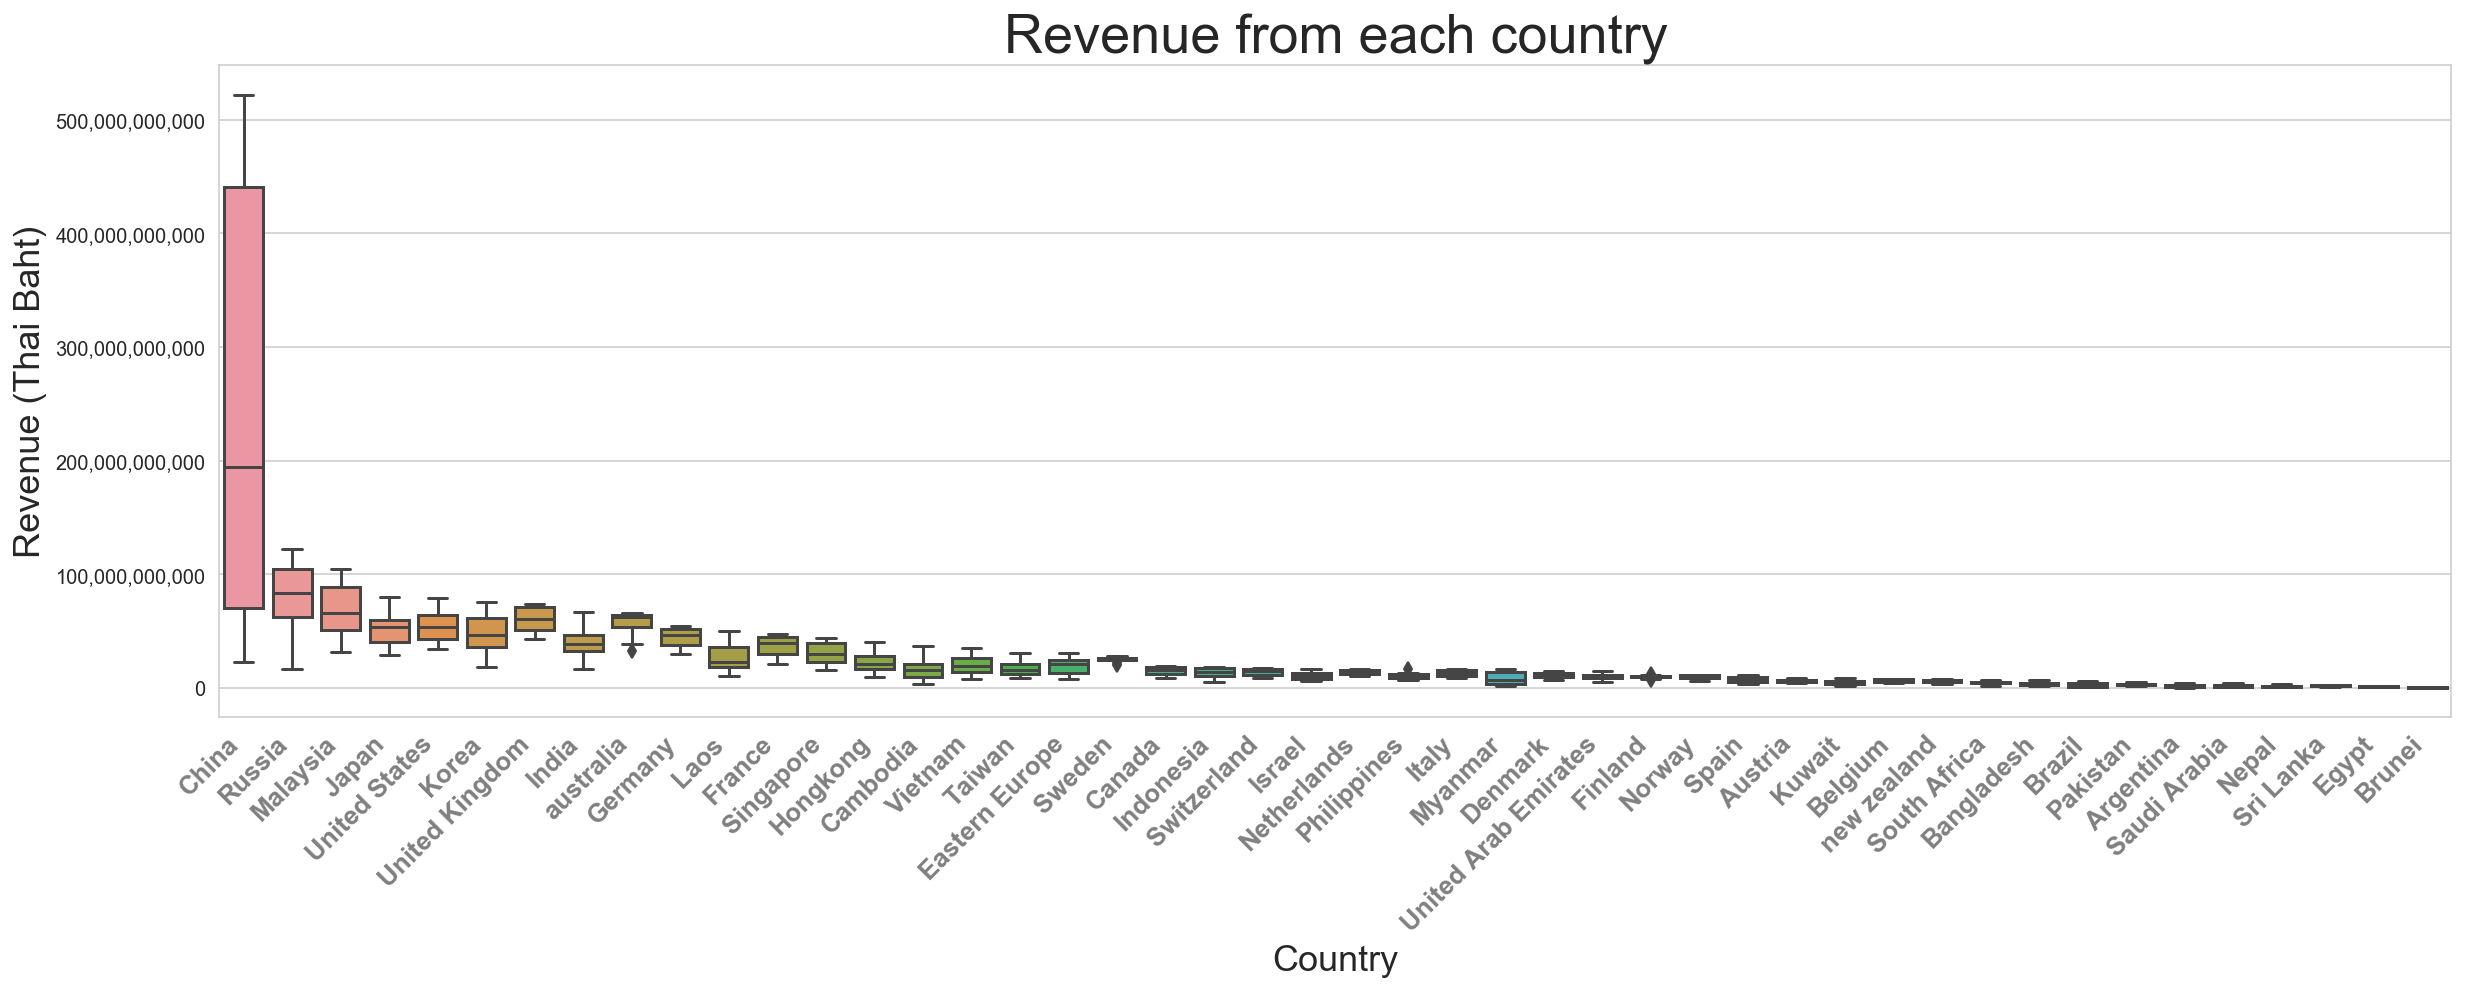

In [13]:
plt.figure(figsize=(20, 6))
rev_tourist_graph = sns.boxplot(data=rev_tourist_long.sort_values(by='Revenue (Thai Baht)',ascending=False), x='Country', y='Revenue (Thai Baht)')

rev_tourist_graph.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# set_name_title_x_y(df,title_name,name_x,name_y,font_size)
set_name_title_x_y(rev_tourist_graph,"Revenue from each country",'Country','Revenue (Thai Baht)',18)



> จากกราฟด้านบนจะเห็นได้อย่างชัดเจนเลยว่า รายได้จากนักท่องเที่ยวชาวจีนนั้นสูงมาก ถ้าจะบอกว่ารายได้จากทุกประเทศรวมกันนั้นอาจจะไม่เท่ารายได้จากจีนนั้นก็คงไม่ถือว่าเป็นไปไม่ได้

# แสดงจำนวนนักท่องเที่ยวแต่ละประเทศที่มาเทียวไทย

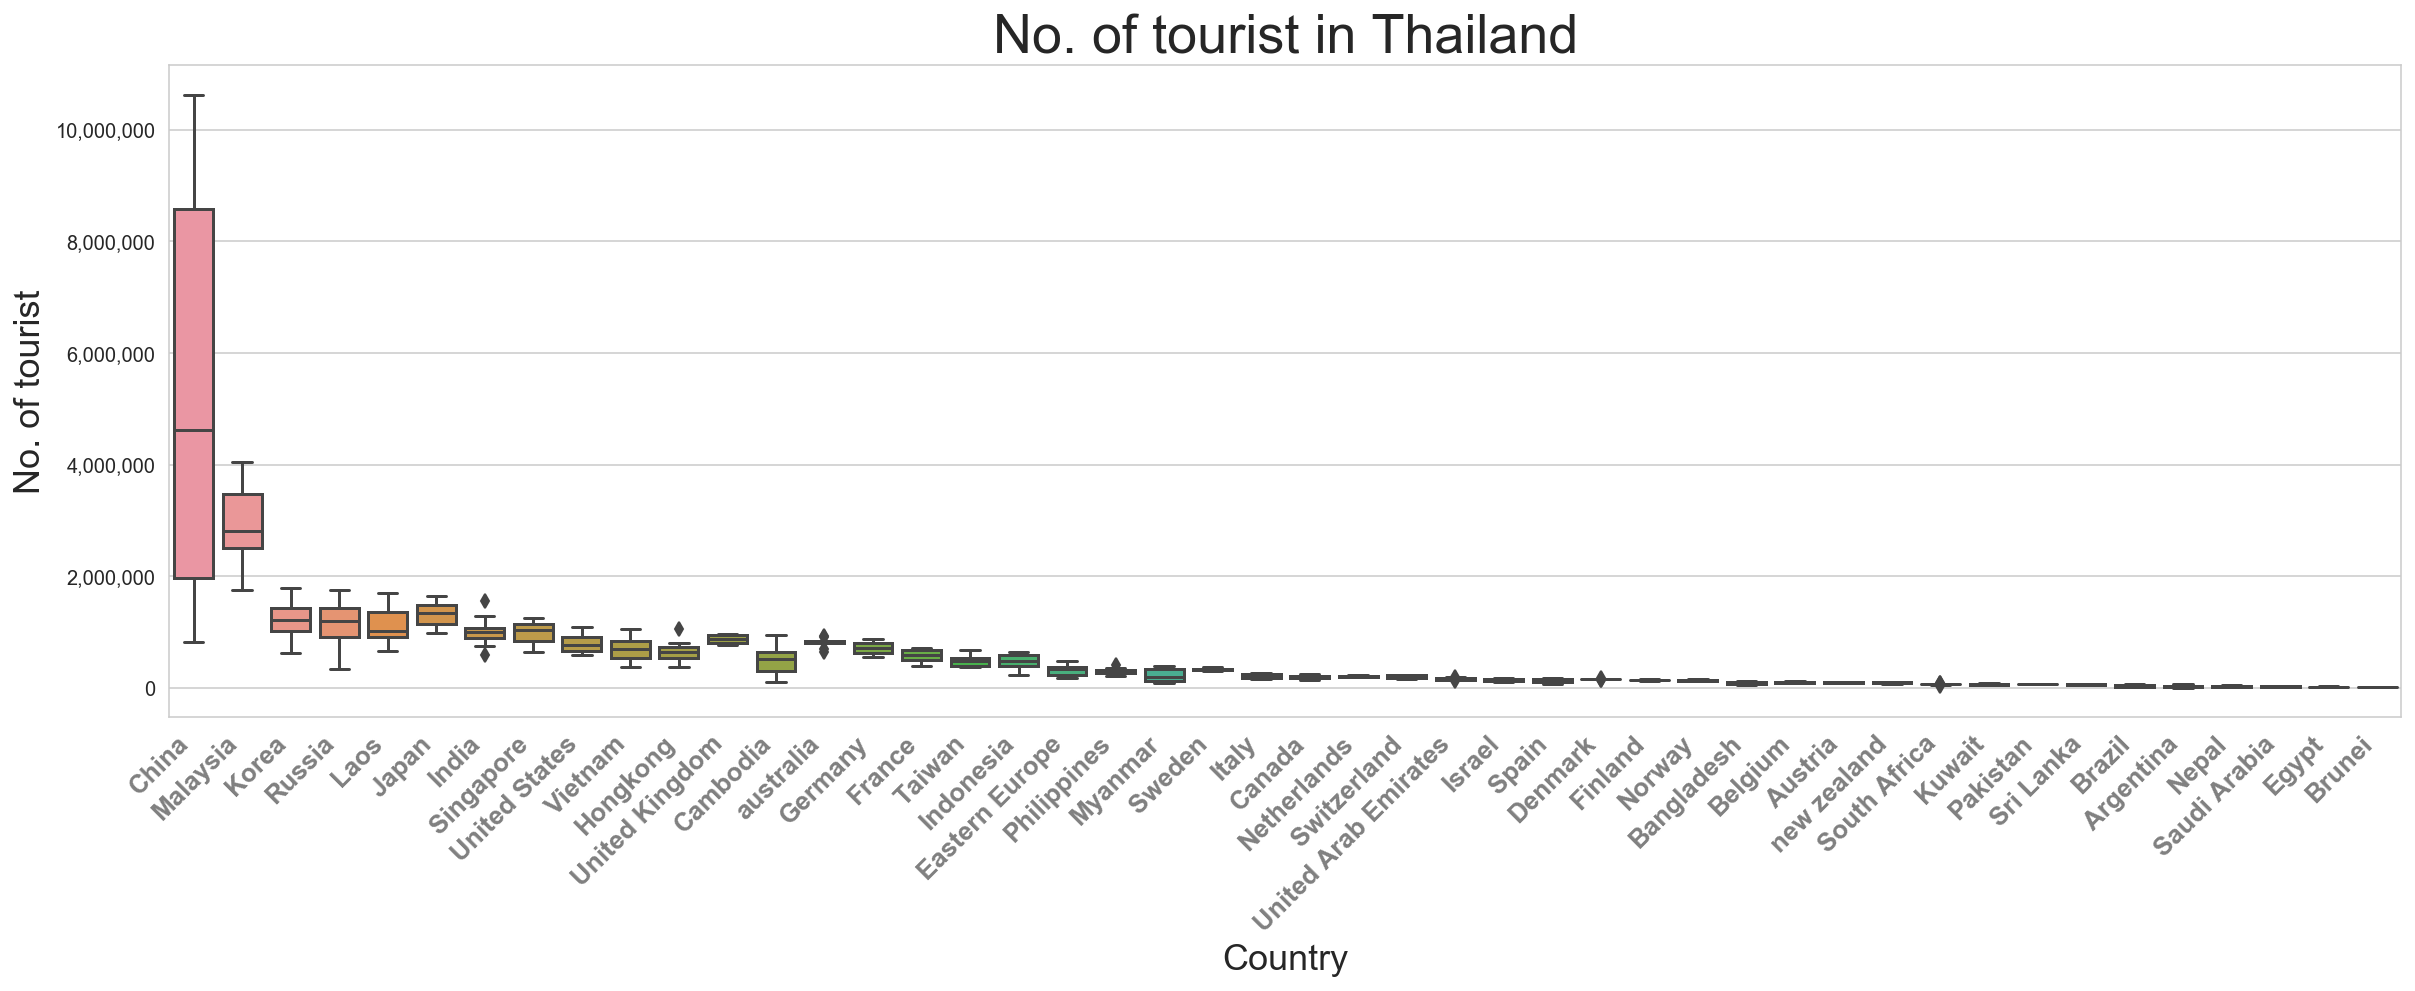

In [14]:
plt.figure(figsize=(20, 6))
tourist_graph_x = sns.boxplot(data=no_tourist_m.sort_values(by='person',ascending=False), x='Country', y='person')

tourist_graph_x.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# set_name_title_x_y(df,title_name,name_x,name_y,font_size)
set_name_title_x_y(tourist_graph_x,'No. of tourist in Thailand','Country','No. of tourist',18)



> และที่มาของรายได้มหาศาลนั้น ก็คือนักท่องเที่ยวจีนมากกว่า 10 ล้านคนต่อปี มากกว่าประชากรชาวไทยในภาคใต้ทั้งภาครวมกันเสียอีก

# ดีจริงไหมกับการพึ่งพาจีนเป็นหลัก?

> แล้วการที่เราปล่อยให้นักท่องเที่ยวจีนมีผลต่อเศรษฐกิจการท่องเที่ยวของเรามากขนาดนี้ ดีต่อเราจริงหรือ แล้วถ้าวันหนึ่งนักท่องเที่ยวลดน้อยลง จะส่งผลกระทบะไรต่อไทยหรือไม่

## ข่าวนักท่องเที่ยวจีนบอยคอตไทยจากเหตุการณ์เรือล่มที่ภูเก็ต

In [15]:
IFrame('https://www.posttoday.com/world/557475', width=1000, height=400)

## ข่าวจีนทำสงครามการค้ากับสหรัฐ

In [16]:
IFrame('https://www.thairath.co.th/scoop/1634660', width=1000, height=400)

## ข่าวผลกระทบจากค่าเงินบาทแข็งตัว

In [17]:
IFrame('http://www.voicetv.co.th/read/MdPbpUzQN',  width=1000, height=400)

จากข่าวด้านบนที่ว่า

> จีนปลุกกระแสบอยคอตเที่ยวไทย

> ข้อหาแรง "จีนบิดเบือนค่าเงินหยวน" เจาะลึกศึกใหม่ "สงครามค่าเงิน" ไทยเจอหางเลข

> เงินบาทแข็งกระทบการท่องเที่ยวไทย

ถ้าสรุปจากข่าวข้างต้นจะเห็นได้ว่า เหตุการณ์ทั้งหมดถือเป็นสถานการณ์วิกฤตของนักท่องเที่ยวจีนเลยก็ว่าได้ เริ่มจากเหตุการณ์เรือนักท่องเที่ยวจีนร่มที่ภูเก็ตเมื่อวันที่ 5 กรกฎาคม 2561 และพล.อ. ประวิตร วงษ์สุวรรณ รองนายกรัฐมนตรี ฝ่ายความมั่นคง ได้แสดงความคิดเห็นต่อเหตุการณ์นี้ว่า 

> "คนจีนเป็นผู้นำนักท่องเที่ยวจีนเข้ามา เป็นเรื่องของนักท่องเที่ยวเขา เขาทำของเขาเอง เขาฝ่าฝืนไม่ปฏิบัติตามคำสั่ง เราจะให้ไปเรียกความเชื่อมั่นได้อย่างไร" 

หลักบทสัมภาษณ์ถูกเผยแพร่ออกไป และเข้าหูชาวจีนเข้า จึงเกิดกระแสบอยคอตการมาเที่ยวไทยในหมู่ชาวจีนขึ้นอย่างรุนแรง ประกอบกับในเดือนถัดมาก็เกิดเหตุการณ์สงครามการค้าระหว่างจีนกับสหรัฐอเมริกาซึ่งสะเทือนเศรษฐกิจทั่วโลก โดยจีนแทรกแซงค่าเงินหยวนให้อ่อนค่าลง เพื่อตอบโต้สหรัฐที่เรียกเก็บภาษีสินค้านำเข้าจากจีนเพิ่มขึ้น 10% หรือเป็นเงินกว่า 300,000 ล้านดอลลาห์สหรัฐ ซึ่งการตอบโต้ระหว่างจีนกับสหรัฐในครั้งนี้ดันประจวบเหมาะกับเหตุการณ์เงินบาทไทยแข็งค่า หลังนักลงทุนหันมาลงทุนในตลาดการเงินไทยเพื่อหนีความผันผวนของตลาดการเงินโลก และเมื่อทั้งสามเหตุการณ์อย่าง 
- นักท่องเที่ยวจีนบอยคอตการมาเที่ยวไทย 
- เงินหยวนอ่อนค่า 
- เงินบาทแข็งค่า 

เกิดขึ้นในช่วงระยะเวลาไล่เลี่ยกัน จะเกิดผลกระทบใดกับการท่องเที่ยวไทย สามารถชมได้จากกราฟด้านล่าง

# ผลกระทบต่อไทยในปัจจุบัน

In [18]:
data_stock = {'Thai Airways Stock' : { 'thai_q1' : 'https://www.set.or.th/set/historicaltrading.do?symbol=THAI&page=0&language=en&country=US&type=trading',
                                    'thai_q2' : 'https://www.set.or.th/set/historicaltrading.do?symbol=THAI&page=1&language=en&country=US&type=trading',
                                    'thai_q3' : 'https://www.set.or.th/set/historicaltrading.do?symbol=THAI&page=2&language=en&country=US&type=trading'},
            'Nok Air Stock' : {'nokair_q1' : 'https://www.set.or.th/set/historicaltrading.do?symbol=NOK&page=0&language=en&country=US&type=trading',
                                'nokair_q2' : 'https://www.set.or.th/set/historicaltrading.do?symbol=NOK&page=1&language=en&country=US&type=trading',
                                'nokair_q3' : 'https://www.set.or.th/set/historicaltrading.do?symbol=NOK&page=2&language=en&country=US&type=trading'},
            'Air Asia Stock' : {'airasia_q1' : 'https://www.set.or.th/set/historicaltrading.do?symbol=AAV&page=0&language=en&country=US&type=trading',
                                'airasia_q2' : 'https://www.set.or.th/set/historicaltrading.do?symbol=AAV&page=1&language=en&country=US&type=trading',
                                'airasia_q3' : 'https://www.set.or.th/set/historicaltrading.do?symbol=AAV&page=2&language=en&country=US&type=trading'}}

# การเก็บข้อมูล df stock เป็น dictionary
stocks_df = {}
for df,name in zip(data_stock,data_stock):
    df = get_stock_df(read_html(data_stock[df]))
    df = change_date_column(df,'Date')
    df.drop(columns=['Total Volume(Shares)',"Total Value('000 Baht)"], inplace=True)
    stocks_df.update({name:df})

In [19]:
allstock = stocks_df['Thai Airways Stock'][['Date','Close']].merge(stocks_df['Nok Air Stock'][['Date','Close']], on='Date',suffixes=('_Thai','_NokAir'))
allstock = allstock.merge(stocks_df['Air Asia Stock'][['Date','Close']], on='Date')
allstock.rename(columns={'Close':'Close_AirAsia'}, inplace=True)
allstock.set_index('Date',inplace=True)

# กราฟเทียบสามสายการบิน

In [20]:
base_date = '2019-09-02'

# แปลงค่าการเปลี่ยนแปลงให้เป็น %
allstock['Thai_pct_diff'] = allstock['Close_Thai'] / allstock['Close_Thai'].at[base_date] - 1
allstock['AirAsia_pct_diff'] = allstock['Close_AirAsia'] / allstock['Close_AirAsia'].at[base_date] - 1
allstock['NokAir_pct_diff'] = allstock['Close_NokAir'] / allstock['Close_NokAir'].at[base_date] - 1

ถ้าพูดถึงการท่องเที่ยว หนึ่งสิ่งที่เป็นส่วนประกอบหลักของการท่องเที่ยวนั้นคือการเดินทาง และการที่นักท่องเที่ยวต่างชาติจะเดินทางมาท่องเที่ยวประเทศไทยได้นั้นจำเป็นต้องเดินทางด้วย "เครื่องบิน" ทางเราจึงนำหุ้นของสามสายการบินชื่อดังของประเทศไทยอย่าง
- การบินไทย
- นกแอร์
- แอร์เอเชีย

มาเปรียบเทียบให้ทุกคนได้เห็นลักษณะของหุ้นทั้งสามสายการบินได้ออย่างชัดเจน

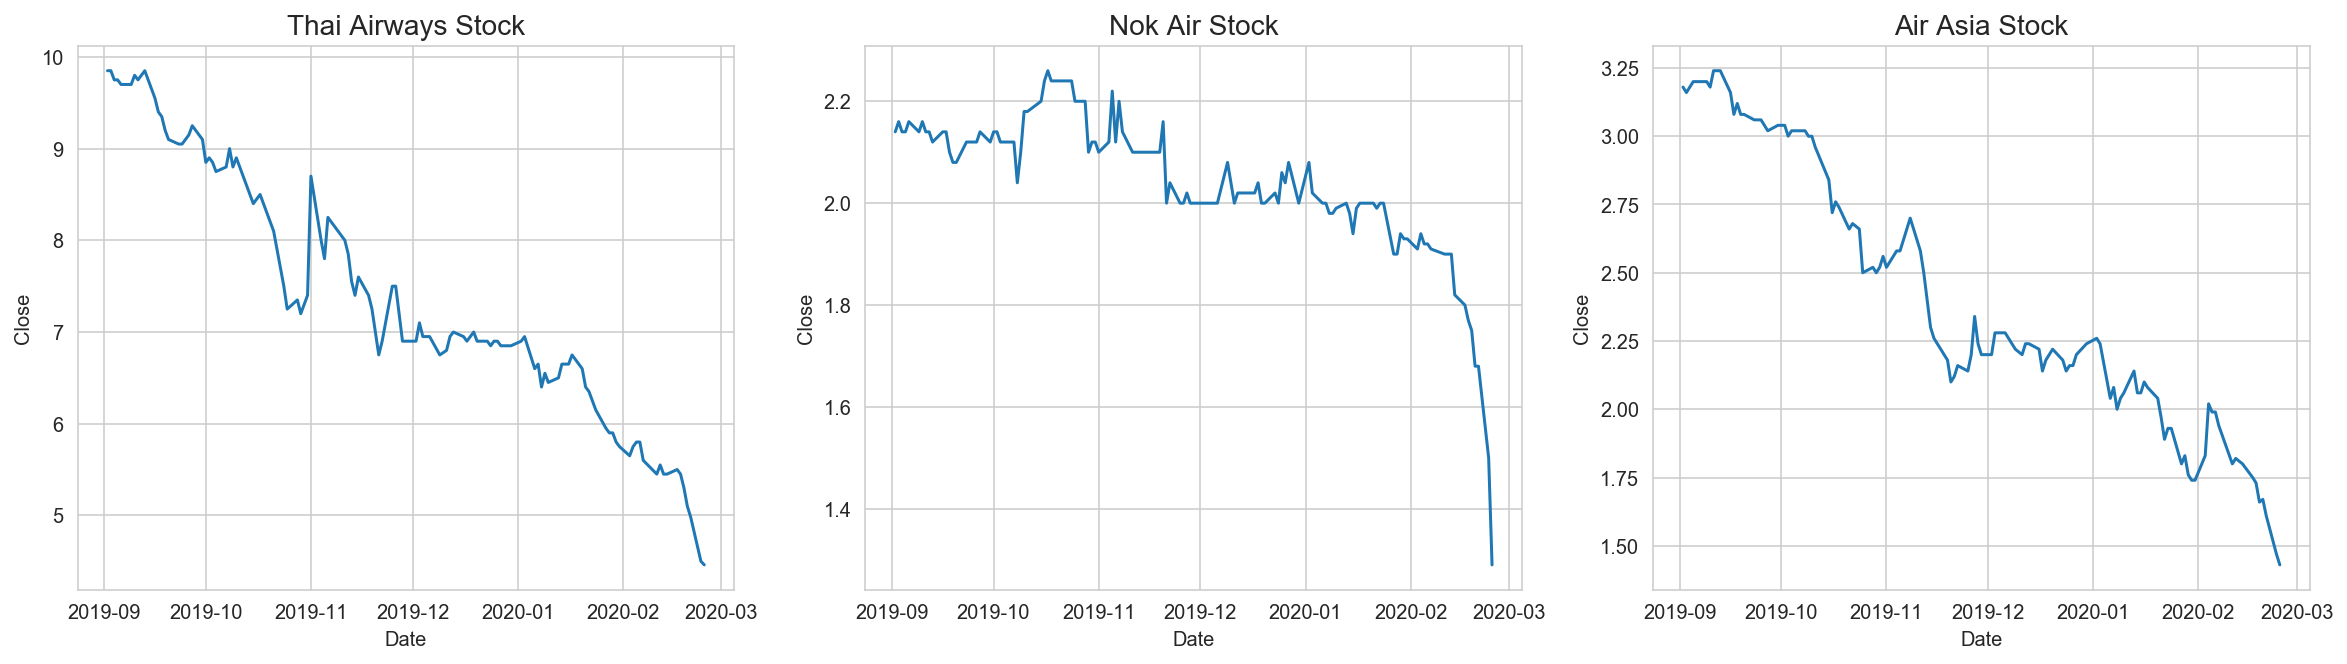

In [21]:
fig, axes = plt.subplots(nrows=1,  ncols=3, figsize=(20,5))
for i,df in enumerate(stocks_df,start=0):
    graph = sns.lineplot(x='Date', y='Close', data=stocks_df[df], ax = axes[i]).set_title(f'{df}', fontsize=14)
    

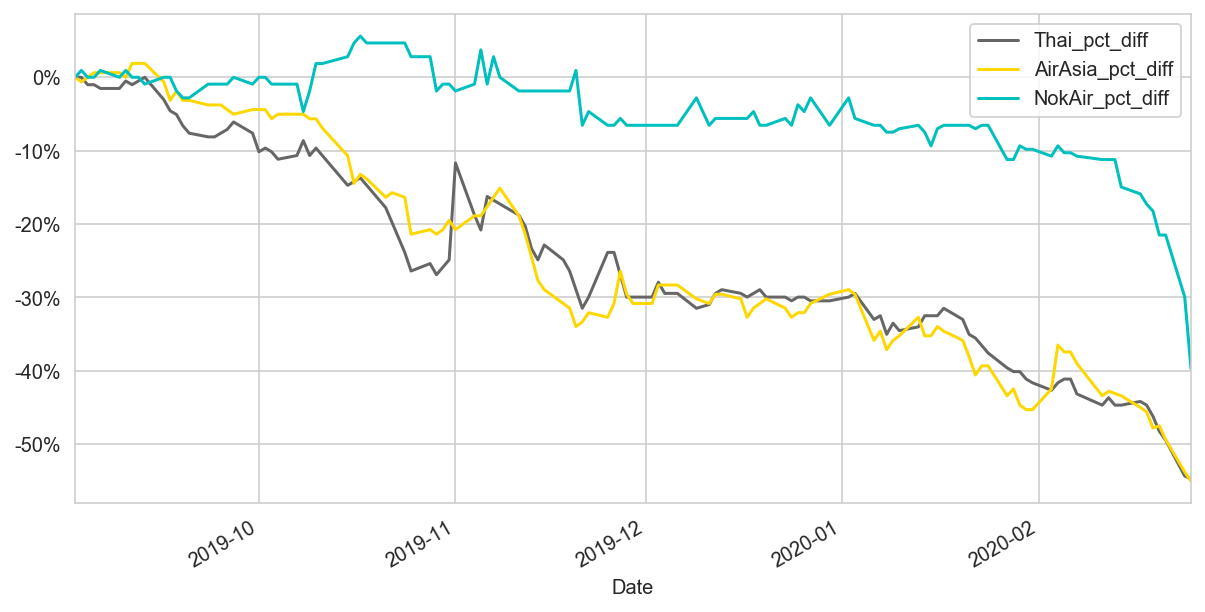

In [22]:
allstock_setvalue = allstock.loc[base_date:, ['Thai_pct_diff', 'AirAsia_pct_diff', 'NokAir_pct_diff']]
allstock_setvalue_graph = allstock_setvalue.plot(kind='line', figsize=(10,5), color=['.4', 'gold', 'c'])
allstock_setvalue_graph.yaxis.set_major_formatter(FuncFormatter(lambda v, p: "{:,.0f}%".format(v * 100)))


จากกราฟด้านบนจะเห็นว่าทิศทางของหุ้นทั้งสามสายการบินนั้นล้วนไปในทิศทางเดียวกัน คือตกลงเรื่อยๆนับตั้งแต่เดือนกันยายน (ข้อมูลหุ้นจากเว็บตลาดหลักทรัพย์มีเพียง 6 เดือนย้อนหลัง) ซึ่งเป็นช่วงเดียวกับเหตุการณ์ทั้งสามที่กล่าวถึงไปในช่วงต้น แต่ถ้าดูจากกราฟหุ้นของสายการบินอย่างเดียวหลายคนอาจจะยังไม่เห็นภาพอิทธิพลของประเทศจีนที่มีต่อเศรษฐกิจการท่องเที่ยวไทย เราจึงำอีก 1 ตัวแปรมาประกอบการพิจารณาด้วย ซึ่งก็คือ "ค่าเงินหยวน"

# ข้อมูลค่าเงินหยวน

In [23]:
col_names = ['Date','Value']
yuan_url ='https://www.dropbox.com/s/xqa9lnrvhu15has/yuan_exch_rate.csv?dl=1'
yuan_df = pd.read_csv(yuan_url, sep=',', skiprows=16, names=col_names, parse_dates=['Date'])
yuan_df['Year'] = yuan_df['Date'].dt.year
yuan_df['Month'] = yuan_df['Date'].dt.month
yuan_df['Day'] = yuan_df['Date'].dt.day
yuan_df['Value'] = yuan_df['Value'].astype(float)
yuan_df.rename(columns = {'Value':'Chinese Yuan'} , inplace=True)

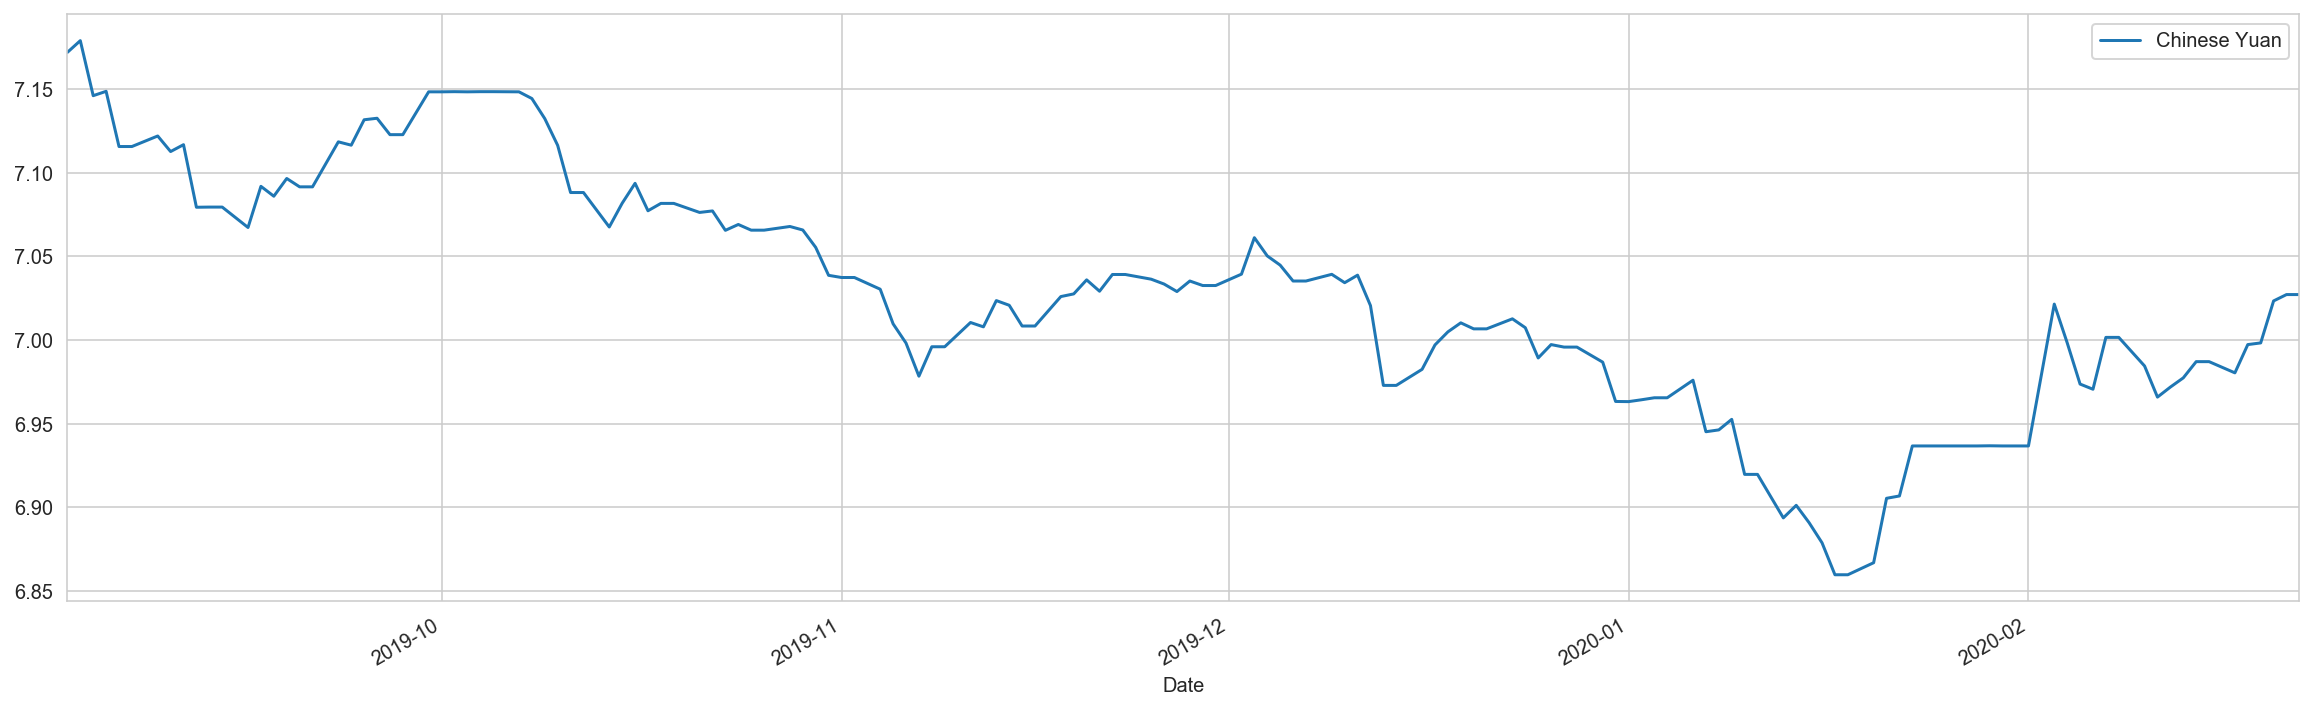

In [24]:
# กราฟค่าเงินหยวน

yuan_sep = yuan_df[['Date','Chinese Yuan']].loc[yuan_df['Date']>='2019-09-01']
yuan_sep.set_index('Date').plot(figsize=(20,6))

# กราฟเทียบระหว่างหุ้นสนามบินกับค่าเงินหยวน

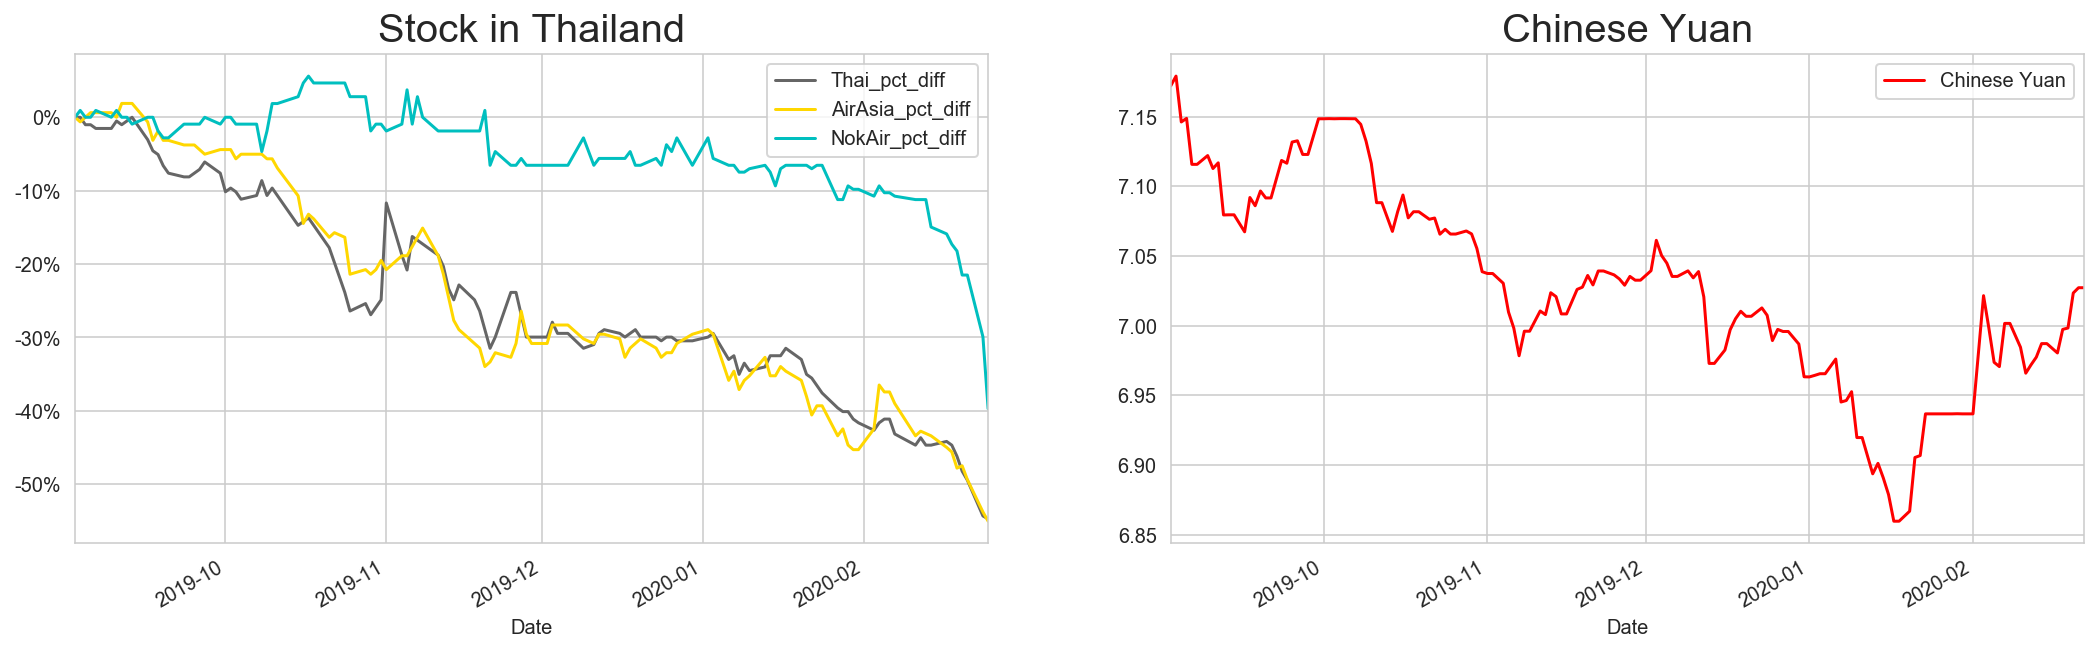

In [25]:
fig, axes = plt.subplots(nrows=1,  ncols=2, figsize=(18,5))
allstock_setvalue = allstock.loc[base_date:, ['Thai_pct_diff', 'AirAsia_pct_diff', 'NokAir_pct_diff']]
allstock_setvalue_graph = allstock_setvalue.plot(kind='line', figsize=(10,5), color=['.4', 'gold', 'c'], ax = axes[0])
allstock_setvalue_graph.yaxis.set_major_formatter(FuncFormatter(lambda v, p: "{:,.0f}%".format(v * 100)));
allstock_setvalue_graph.set_title('Stock in Thailand', size=20);


yuan_sep.set_index('Date').plot(figsize=(18,5), color='r', ax = axes[1]).set_title('Chinese Yuan', size=20);

จากกราฟทั้งสองจะเห็นได้ว่าการตกลงของราคา ณ เวลาปิดของหุ้นทั้งสามสายการบิน และ กราฟค่าเงินหยวน ไปในทิศทางเดียวกัน ซึ่งอาจจะพอสรุปได้ว่าประเทศจีนมีผลกระทบกับการท่องเที่ยวจริงๆ แต่หลายๆคนอาจจะสงสัยสัยว่าค่าเงินหยวนแข็งขึ้นแล้วในช่วงเดือนกุมภาพันธ์ แล้วทำไมหุ้นสายการบินยังไม่ขึ้นตามหล่ะ สรุปแล้วจีนมีผลจริงหรือไม่ ซึ่งในเหตุการณ์นี้เกิดขึ้นจากไทยโดนเคราะห์ซ้ำจากการระบาดของไวรัส โควิด-19 ซึ่งก็เป็นต้นเหตุจากการที่รัฐบาลไทยไม่ออกมาตการป้องกันกับนักท่องเที่ยวจีน ทำให้เสียความเชื่อมั่นในสายตานักท่องเที่ยวชาติอื่น แต่อย่างไรก็ตามการระบาดของไวรัสต่างก็ส่งผลกระทบต่อการท่องเที่ยวทั้งในและนอกประเทศจึงทำให้หุ้นของสายการบินยังคงตกลงเรื่อยๆ

# Tourism in South Korea

In [26]:
# ดึงข้อมูสถิตินักท่องเที่ยวที่เดินทางไปยังประเทศเกาหลีใต้ในช่วง 4ปี คือตั้งแต่2015จนถึงปี2018 จากเว็บ wikipedia

korea_url='https://en.wikipedia.org/wiki/Tourism_in_South_Korea'
korea_df=pd.read_html(korea_url, match='Country')
tourist_korea = korea_df[0]
tourist_korea.drop('Rank',axis=1,inplace=True) # drop Rank column
tourist_korea.drop(index = 12, inplace = True) # drop NaN row
tourist_korea = tourist_korea[['Country', '2015', '2016', '2017','2018']] # เรียงลำดับปีใหม่ จากปีก่อนไปปีหลัง
tourist_korea.set_index('Country',inplace=True) # กำหนดให้ column 'Country' เป็นindex

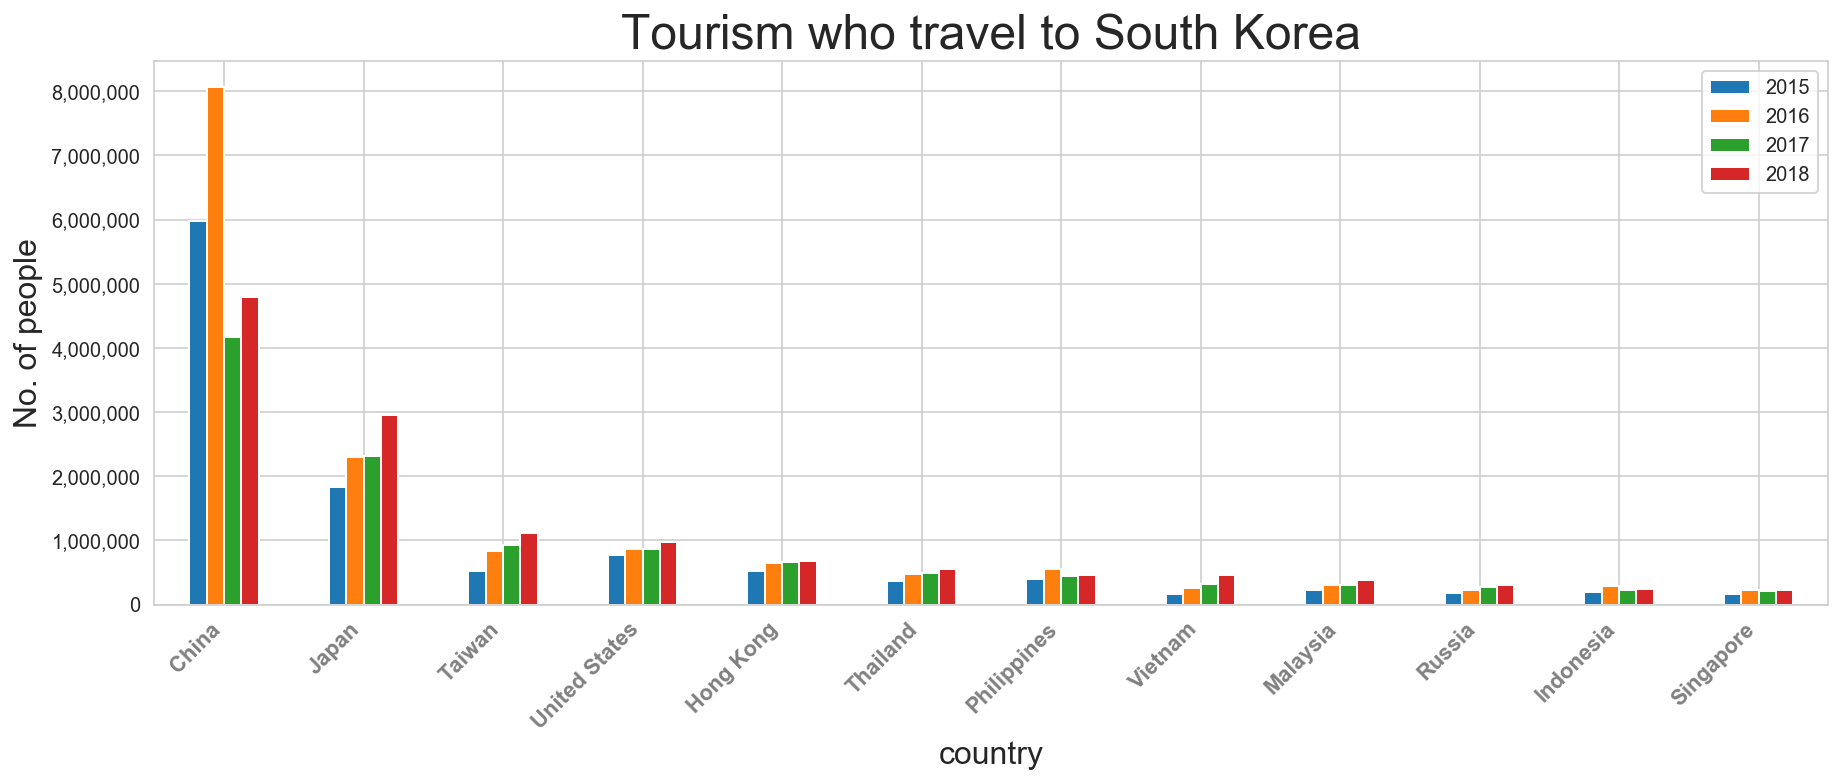

In [27]:
tourist_korea_graph = tourist_korea.plot(kind='bar',figsize=(15,5))
set_name_title_x_y(tourist_korea_graph,'Tourism who travel to South Korea','country','No. of people',16)
tourist_korea_graph.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# "ขีปนาวุธ US" : ความขัดแย้งระหว่างจีนและเกาหลีใต้
จากกราฟแสดงให้เห็นว่าจำนวนนักท่องเที่ยวประเทศจีนที่เดินทางไปยังประเทศเกาหลีใต้ จากปี2016ไปยังปี2017 มีอัตราลดลงอย่างเห็นได้ชัด ทั้งนี้เป็นเหตุผลมาจากปมขัดแย้งระหว่าง2ประเทศดังกล่าว
ซึ่งสาเหตุที่ประเทศจีนตัดสินใจคว่ำบาตรประเทศเกาหลีใต้ เนื่องจากประเทศเกาหลีใต้ติดตั้งระบบขีปนาวุธซึ่งถูกผลิตในสหรัฐอเมริกา

link ข่าว : https://qz.com/1149663/china-south-korea-relations-in-2017-thaad-backlash-and-the-effect-on-tourism/

![](https://www.dropbox.com/s/3p6ib389rpnqo35/Screenshot%202563-02-25%20at%2021.53.45.png?dl=1)

In [28]:
# แหล่งข้อมูล : https://kto.visitkorea.or.kr/eng/tourismStatics/keyFacts/KoreaMonthlyStatistics/eng/inout/inout.kto

rev_korea = pd.read_csv('https://www.dropbox.com/s/rsb4b9pqzpif348/receipt_korea.csv?dl=1')
rev_korea = rev_korea.dropna(axis = 1, how = 'all')  # drop column ที่ไม่เกี่ยวออก
rev_korea.set_index('Month',inplace=True)
# rev_korea.rename(columns={'2017 ':'2017'}, inplace=True)

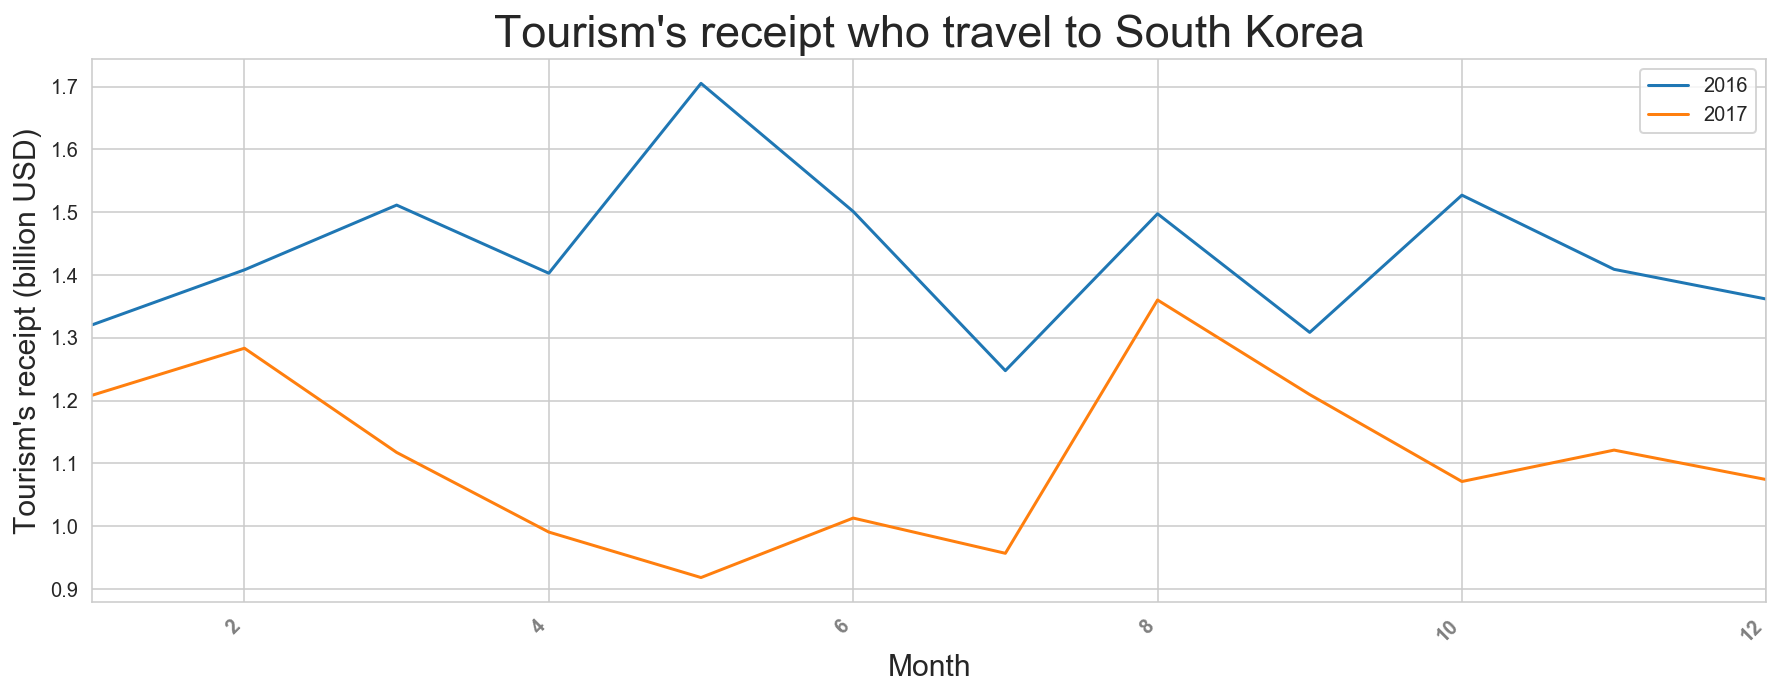

In [29]:
rev_korea_graph = rev_korea[['2016','2017']].apply(lambda r: r/1000000, axis=0).plot(kind='line',figsize=(15,5)) #แปลงค่าหน่วยให้เป็น billion แล้วทำการพล็อตกราฟ
set_name_title_x_y(rev_korea_graph,"Tourism's receipt who travel to South Korea","Month","Tourism's receipt (billion USD)",15)

- จากอัตราการลดลงของนักท่องเที่ยวประเทศจีนที่เดินทางไปยังประเทศเกาหลีใต้ในช่วงปี2017 ส่งผลให้รายรับที่ประเทศเกาหลีใต้ได้รับจากนักท่องเที่ยวลดลงอย่างเห็นได้ชัด แสดงให้เห็นผลชัดเจนว่ารายได้นักท่องเที่ยวส่วนใหญ่ของเกาหลีมาจากประเทศจีนและเกาหลีเพิ่งพาประเทศจีนมากเกินไป ทำให้เวลามีปัญหากันแล้วจีนประท้วง รายได้การท่องเที่ยวของเกาหลีจึงตกอยากมีนัยสำคัญ

# ข้อสังเกต : ประเทศเกาหลีใต้มีลักษณะกราฟจำนวนนักท่องเที่ยวคล้ายประเทศไทย
- จำนวนนักท่องเที่ยวชาวจีนมีจำนวนมากสุดอย่างเห็นได้ชัด : หากเกิดเหตุการณ์ที่ทำให้มีปัญหาระหว่างประเทศ จะส่งผลเสียต่อรายได้ที่ได้รับจากนักท่องเที่ยวเป็นอย่างมาก เช่นเดียวกับประเทศเกาหลีใต้ ดังนั้น ประเทศไทยจึงควรที่จะมองหาประเทศอื่นที่สามารถกระจายรายรับเพื่อทำให้เกิดความเสียหายน้อยที่สุด
- หาประเทศที่รายได้นักท่องเที่ยวต่อหัวมากกว่านักท่องเที่ยวชาวจีน อีกทั้งยังมีอัตราการเติบโตของนักท่องเที่ยวในทิศทางบวก เพื่อที่จะกระตุ้นทำให้เกิดรายได้เพิ่มและเป็นอีกทางเลือกหนึ่ง

# หาค่าเฉลี่ยต่อหัวของนักท่องเที่ยวย้อนหลัง 3 ปี
- เพื่อดูค่ารายได้ต่อหัวของนักท่องเที่ยวทุกประเทศ

In [30]:
per_person = rev_tourist.merge(no_tourist[['Country','2559']], on='Country' , suffixes = ('','_person'))
per_person[f'avg_2559'] = per_person['2559'].astype(float)/per_person[f'2559_person'].astype(float)
per_person.drop(columns=['2552','2553','2554','2555','2556','2557','2558','2559','2559_person'] , inplace=True)

for i in ['2560','2561']:
    per_person = per_person.merge(no_tourist[['Country',i]], on='Country' , suffixes = ('','_person'))
    per_person[f'avg_{i}'] = per_person[f'{i}'].astype(float)/per_person[f'{i}_person'].astype(float)
    per_person.drop(columns=[f'{i}',f'{i}_person'] , inplace=True)

# หาประเทศที่มีค่าเฉลี่ยต่อหัวสูงกว่าประเทศจีน เพื่อจะหาตัวเลือกใหม่ที่ดีกว่าจีนเป็นทางสำรองไว้

In [31]:
per_person.loc[per_person['Country'].isin(['China'])]

,continent,Country,avg_2559,avg_2560,avg_2561
9,East Asia,China,"52,161.38","52,882.30","49,153.56"


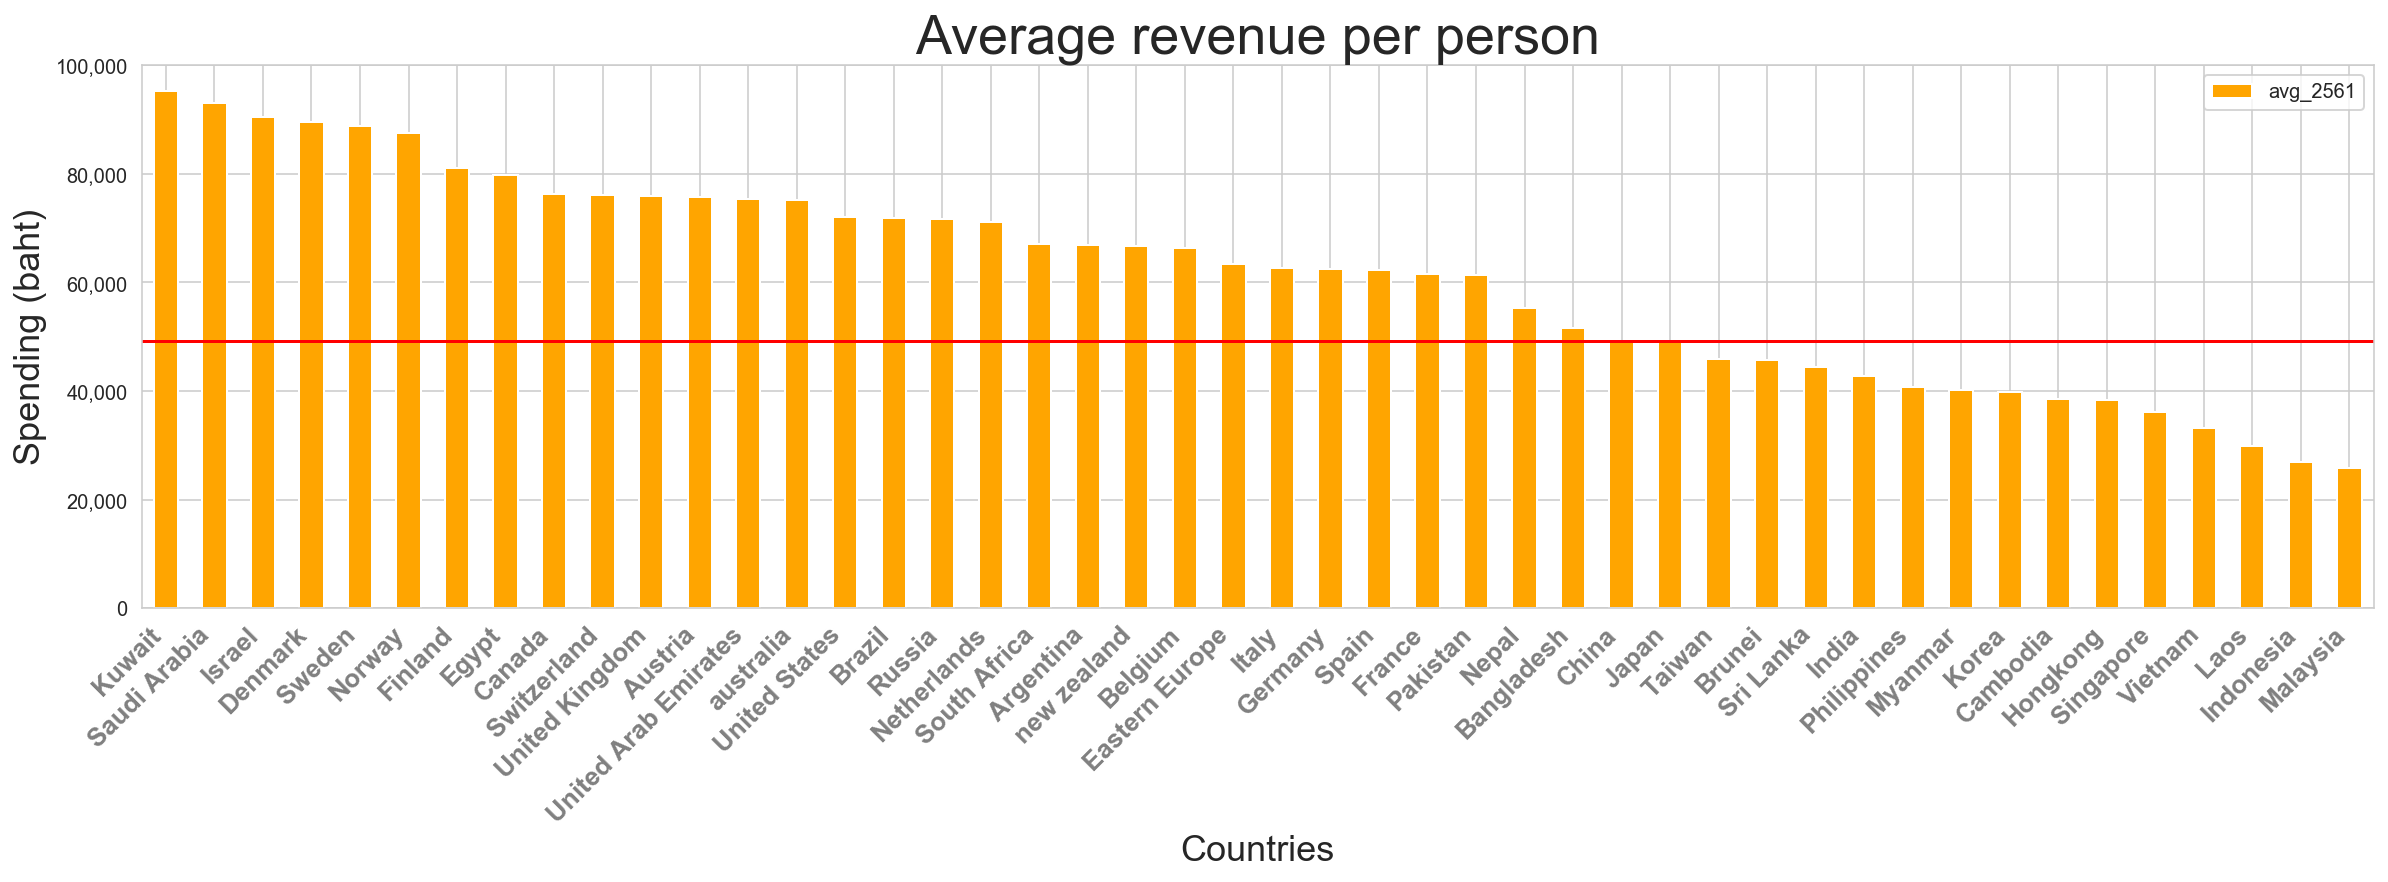

In [32]:
avg_countries = per_person[['Country','avg_2561']].set_index('Country').sort_values(by='avg_2561',ascending=False)
avg_graph = avg_countries.plot(kind='bar', color='orange',figsize=(20,5),)

#สร้างเส้น average ค่าใช้จ่ายต่อหัวของคนจีน
plt.axhline(per_person.at[9,'avg_2561'], color='red')

#การ format ตัวเลขแกน y
avg_graph.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# set_name_title_x_y(df,title_name,name_x,name_y,font_size)
set_name_title_x_y(avg_graph,'Average revenue per person','Countries','Spending (baht)',18)

In [33]:
upper_cn = per_person
upper_cn['china_avg'] = per_person.at[9,'avg_2561']

#เลือกประเทศที่มีค่าเฉลี่ยที่มากกว่าประเทศจีน
upper_cn = upper_cn[['Country','avg_2559','avg_2560','avg_2561','china_avg']].loc[upper_cn['avg_2561']>upper_cn['china_avg']]

In [34]:
#list ประเทศที่มีค่าเฉลี่ยมากกว่าประเทศจีน
upper_cn_list = upper_cn['Country'].tolist()
upper_cn_list

['Austria',
 'Belgium',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Italy',
 'Netherlands',
 'Norway',
 'Russia',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom',
 'Eastern Europe',
 'Argentina',
 'Brazil',
 'Canada',
 'United States',
 'Bangladesh',
 'Nepal',
 'Pakistan',
 'australia',
 'new zealand',
 'Egypt',
 'Israel',
 'Kuwait',
 'Saudi Arabia',
 'United Arab Emirates',
 'South Africa']

# หาประเทศที่มีค่าการเติบโตของจำนวนนักท่องเที่ยวเพิ่มสูงขึ้น
- เลือกกระตุ้นนักท่องเที่ยวที่มีการเติบโตที่ดีอยู่แล้วมา 5 ประเทศ(top5) เพราะจะได้สะดวกและไม่ต้องลงทุนเยอะ

In [35]:
no_upper_cn = no_tourist_m.loc[no_tourist_m['Country'].isin(upper_cn_list)]  #ดึงประเทศที่อยู่ใน list ของประเทศที่มีค่าใช้จ่ายต่อหัวสูงกว่าประเทศจีน
no_upper_cn = no_upper_cn.pivot_table(index = 'Year',columns='Country',values='person') #pivot ข้อมูลให้กลายเป็น wide format

In [36]:
#หา % Change ของจำนวนนักท่องเที่ยวย้อนหลัง 2 ปี
no_upper_cn_pct = no_upper_cn.pct_change(periods=2)
no_upper_cn_pct = pd.melt(no_upper_cn_pct.reset_index(), id_vars=['Year'] , var_name= 'Country', value_name='%change') # แปลง df % change ให้กลับมาเป็น long format

In [37]:
# list ประเทศที่มีอัตราการเติบโตของจำนวนนักท่องเที่ยวมากที่สุด 10 อันดับแรกในปี 2561
largest_growth = no_upper_cn_pct.loc[no_upper_cn_pct['Year'] == '2561'].nlargest(5,'%change') #ดึงเฉพาะอัตราการเปลี่ยนแปลงย้อนหลัง 3 ปีที่ปี 2561 ออกมา 5 อันดับ
largest_growth_list = largest_growth['Country'].tolist()

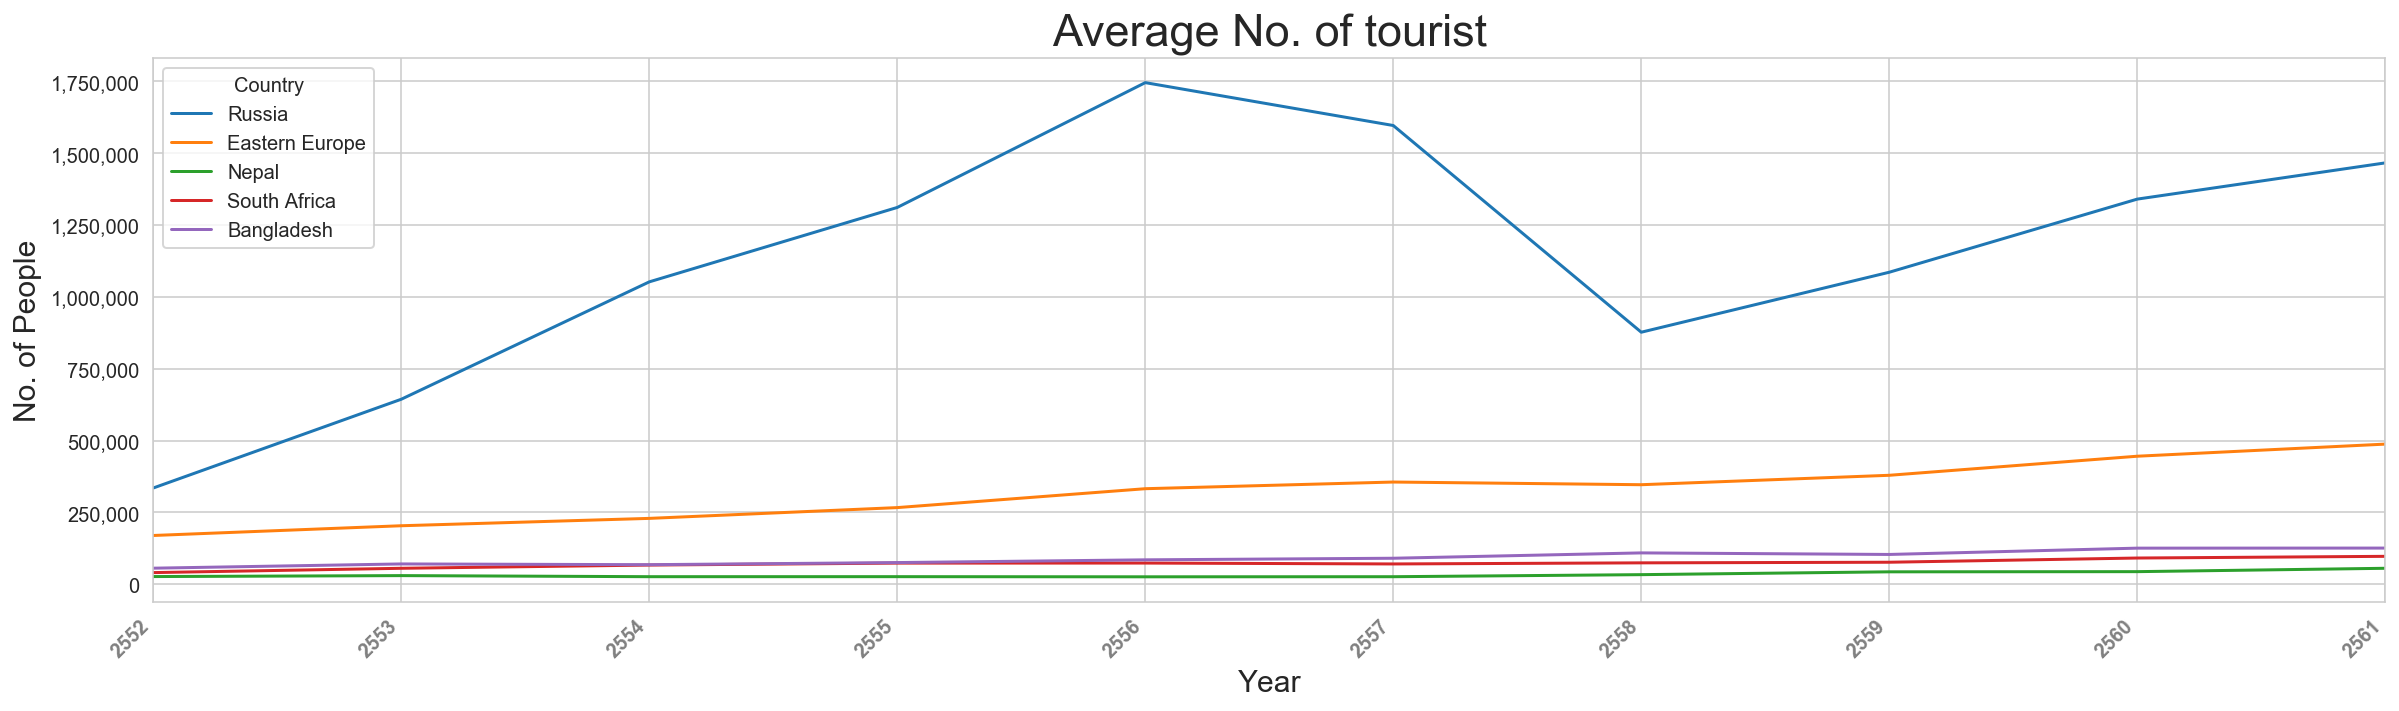

In [38]:
#ดูกราฟจำนวนนักท่องเที่ยวของประเทศที่มีอัตราการเติบโตของจำนวนนักท่องเที่ยวสูงสุด 10 อันดับแรก
no_tourist_graph = no_tourist_p[largest_growth_list].plot(figsize=(20,5))

#ตั้งชื่อแกน x และแกน y จากนั้นตั้งชื่อตาราง
set_name_title_x_y(no_tourist_graph,'Average No. of tourist','Year','No. of People',15)

#การ format ตัวเลขแกน y
no_tourist_graph.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# ดูอัตราการเติบโตของจำนวนนักท่องเที่ยวแยกประเทศ

In [39]:
# ดึงประเทศที่มีค่าใช้จ่ายต่อหัวสูงกว่าจีนและมีอัตราการเติบโตของจำนวนนักท่องเที่ยวมากที่สุด 10 อันดับแรกในปี 2561
top_spend_growth = no_tourist_m.loc[no_tourist_m['Country'].isin(largest_growth_list)]

# สร้าง Dropdown list ไว้ให้เลือกประเทศที่ต้องการจะดู
top_growth_country = widgets.Dropdown(options=top_spend_growth[top_spend_growth.Country.notna()]['Country'].sort_values().unique(),
                                     description='Country:',
                                     disabled=False,)
display(top_growth_country)

Dropdown(description='Country:', options=('Bangladesh', 'Eastern Europe', 'Nepal', 'Russia', 'South Africa'), …

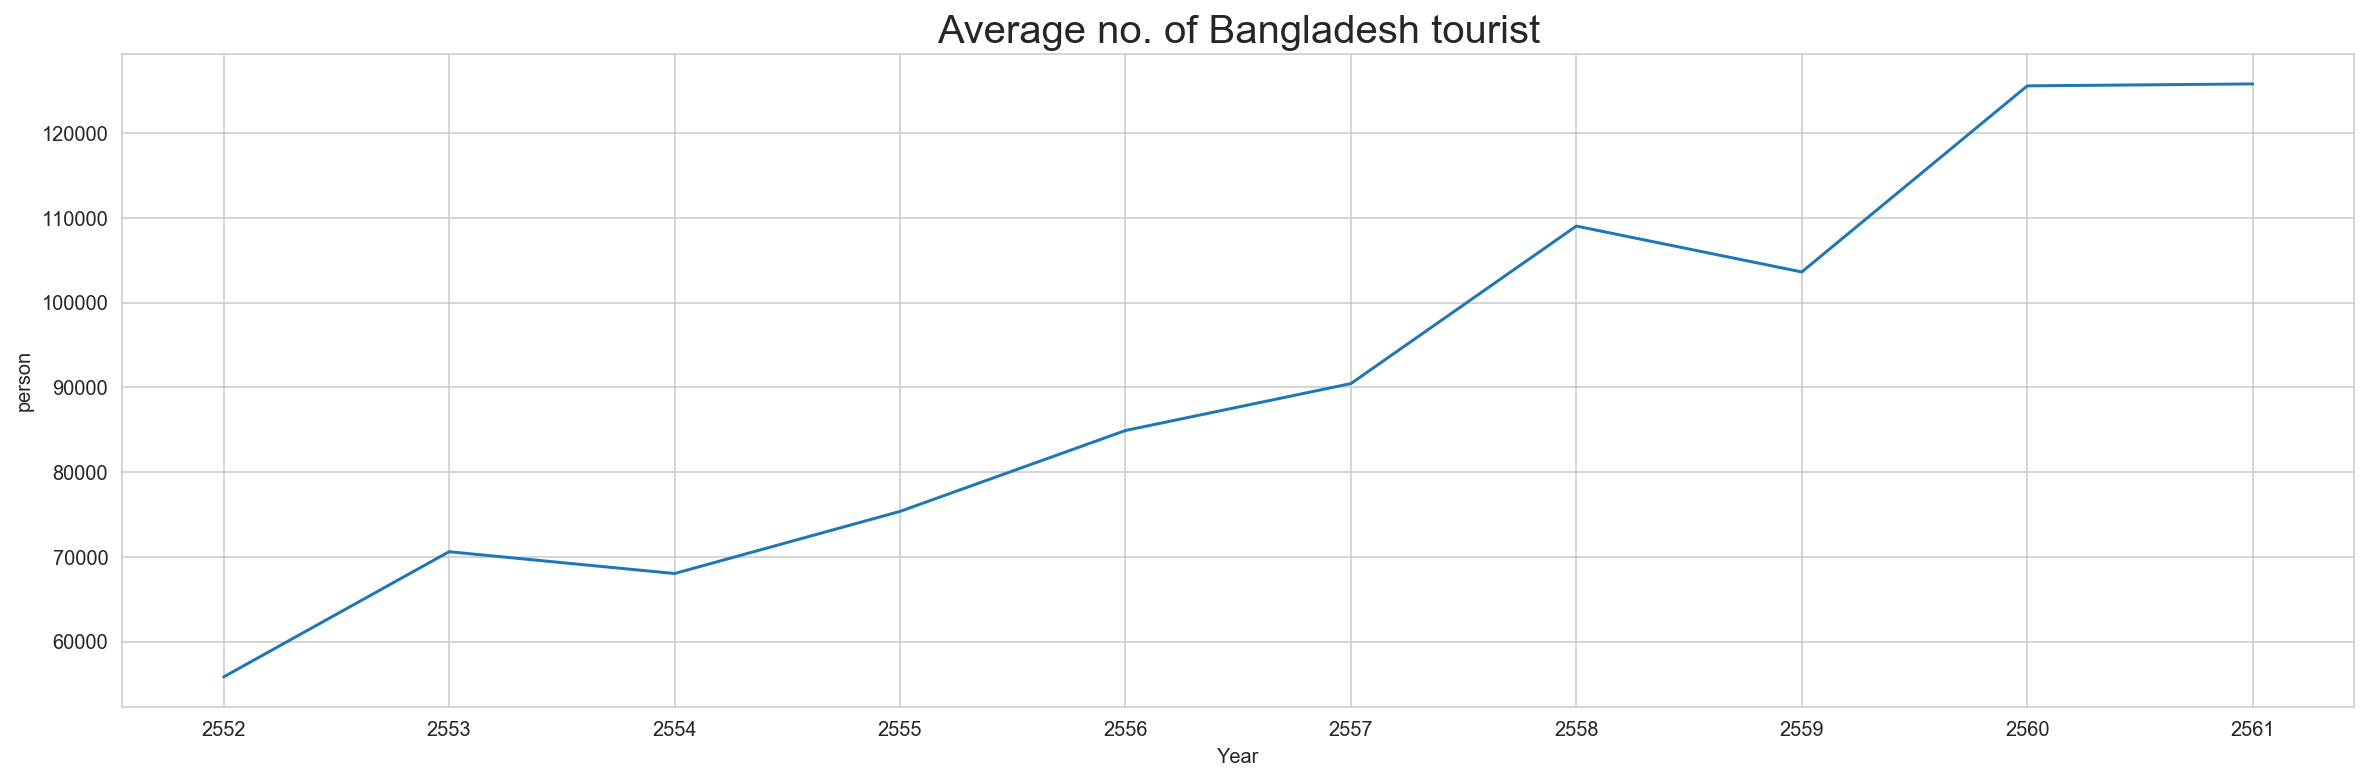

In [40]:
visual = no_tourist_m.loc[no_tourist_m['Country'] == top_growth_country.value].drop(columns='continent').set_index('Country')
plt.figure(figsize=(20,6))
visual_graph = sns.lineplot(x='Year', y='person', data=visual)
plt.title(f'Average no. of {top_growth_country.value} tourist', fontsize = 20);

# อัตราส่วนนักท่องเที่ยวที่มาไทยต่อประชากรทั้งหมด

In [41]:
# ดึงข้อมูลจำนวนประชากรทั้งหมดในปี 2561 ของแต่ละประเทศ
populations = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)')
populations = populations[3]
populations.drop(columns=['UN continentalregion[4]','UN statisticalregion[4]'], inplace=True)
populations['Country or area'] = populations['Country or area'].str.replace('\[.+\]', '')
populations.rename(columns={'Country or area':'Country', 'Population(1 July 2018)':'2561', 'Population(1 July 2019)':'2562'}, inplace=True)

# รวมข้อมูลจำนวนประชากรในกลุ่มประเทศ eastern europe
eastern_europe = ['Bulgaria', 'Hungary', 'Czech Republic', 'Ukraine', 'Moldova', 'Belarus', 'Slovakia', 'Romania', 'Poland','Montenegro', 'Serbia', 'Albania', 'Croatia']
EE_tourist = populations[['Country','2561']].loc[populations['Country'].isin(eastern_europe)]
add_EE = pd.DataFrame([['Eastern Europe', EE_tourist['2561'].sum()]], columns=['Country','2561'])
top_tourist_pop = populations[['Country','2561']].loc[populations['Country'].isin(largest_growth_list)].append(add_EE)

# รวมจำนวนนักท่องเที่ยวที่เคยมาเที่ยวในประเทศไทย แยกตามประเทศ
top_tourist = no_tourist[['Country','2552','2553','2554','2555','2556','2557','2558','2559','2560','2561']].loc[no_tourist['Country'].isin(largest_growth_list)]
top_tourist['total'] = top_tourist['2552'] + top_tourist['2553'] + top_tourist['2554'] + top_tourist['2555']+ top_tourist['2556']+ top_tourist['2557']+ top_tourist['2558']+ top_tourist['2559']+ top_tourist['2560']+ top_tourist['2561']
top_tourist_total = top_tourist[['Country','total']]

# เปรียบเทียบจำนวนประชากรที่เคยมาเที่ยวในไทยและไม่เคยมาเที่ยวในไทยในแต่ละประเทศ
compare = top_tourist_total.merge(top_tourist_pop, left_on='Country', right_on='Country')
compare['come'] = compare['total']
compare['not_come'] = compare['2561'] - compare['total']

#เปลี่ยนให้เป็น long format
compare_m = pd.melt(compare[['Country','come','not_come']], id_vars=['Country'] , var_name= 'type', value_name='person') 

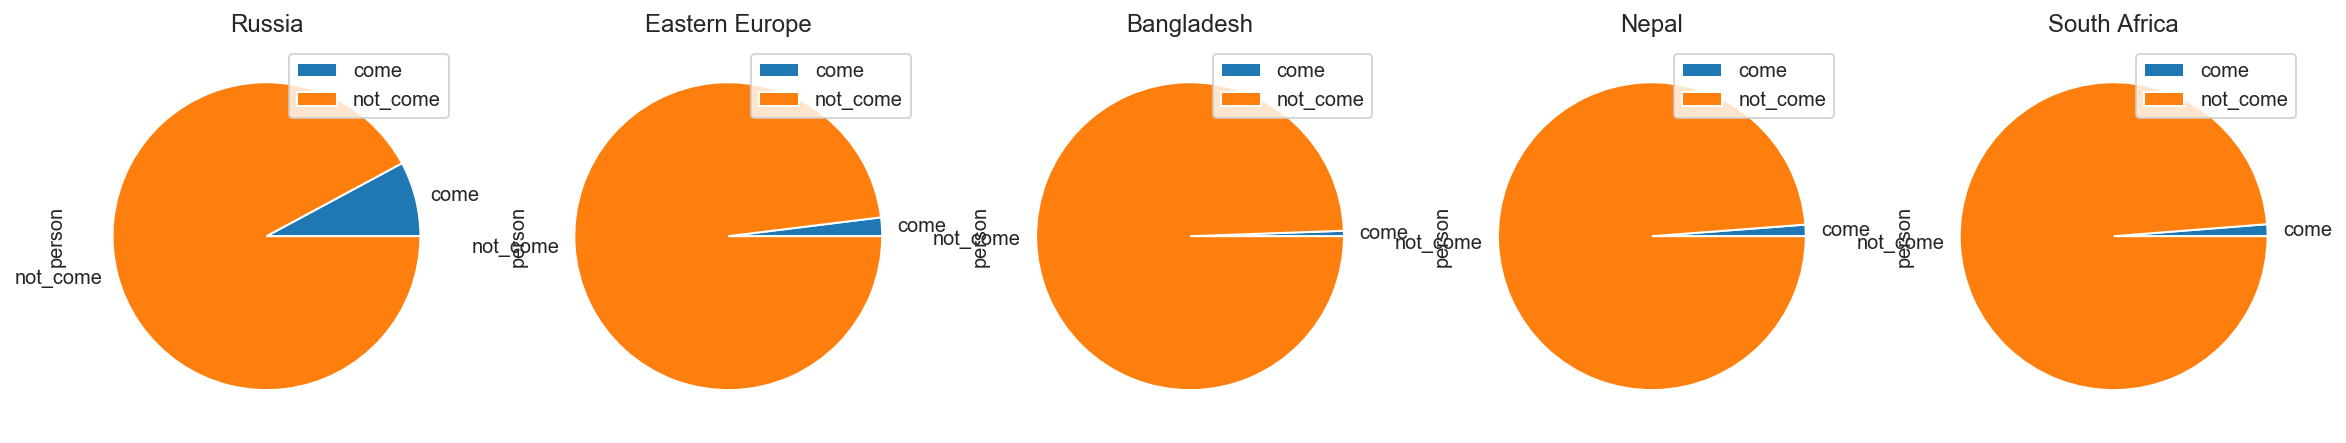

In [42]:
# แสดง pie graph เปรียบเทียบจำนวนคนที่เคยมาเที่ยวในไทยในประเทศนั้นๆ

fig, axes = plt.subplots(nrows=1,  ncols=5, figsize=(20,10))
for i,country in enumerate(compare_m['Country'].unique()):
    compare_m.loc[compare_m['Country'] == country].plot(kind='pie', y='person', labels=['come','not_come'], title=country, ax = axes[i])

- จะเห็นได้ว่า อัตราส่วนจำนวนประชากรที่เข้ามาเที่ยวต่อจำนวนประชากรทั้งหมดของประเทศนั้นๆยังอยู่ในสัดส่วนที่น้อยมาก แสดงให้เห็นว่าทั้ง 5 ประเทศนี้ยังมีคนอีกกลุ่มใหญ่ที่เราสามารถดึงดูดเข้ามาท่องเที่ยวในไทยได้ และคุ้มค่าที่จะลงทุน

# ข้อมูลอายุของนักท่องเที่ยวในประเทศต่างๆ
- ดึงข้อมูลช่วงอายุของนักท่องเที่ยวที่เข้ามาในไทยแต่ของล่ะประเทศ เพื่อศึกษาพฤติกรรมของนักท่องเที่ยวแล้วนำข้อมูลมาสนับสนุนนโยบาบในการจัดโครงการหรืออีเว้นกระตุ้นให้เกิดการท่องเที่ยวให้เพิ่มขึ้น

In [43]:
# ดึงข้อมูลอายุของนักท่องเที่ยว 
age_tourist = pd.read_excel('https://www.dropbox.com/s/iuwl1pu770o8b1v/age.xlsx?dl=1',skiprows=3)
age_tourist = age_tourist[:-2]

# group แค่ประเทศที่ต้องการเพื่อดึงข้อมูลเฉพาะส่วน
age_tourist_g = age_tourist.loc[age_tourist['Country'].isin(largest_growth_list)]

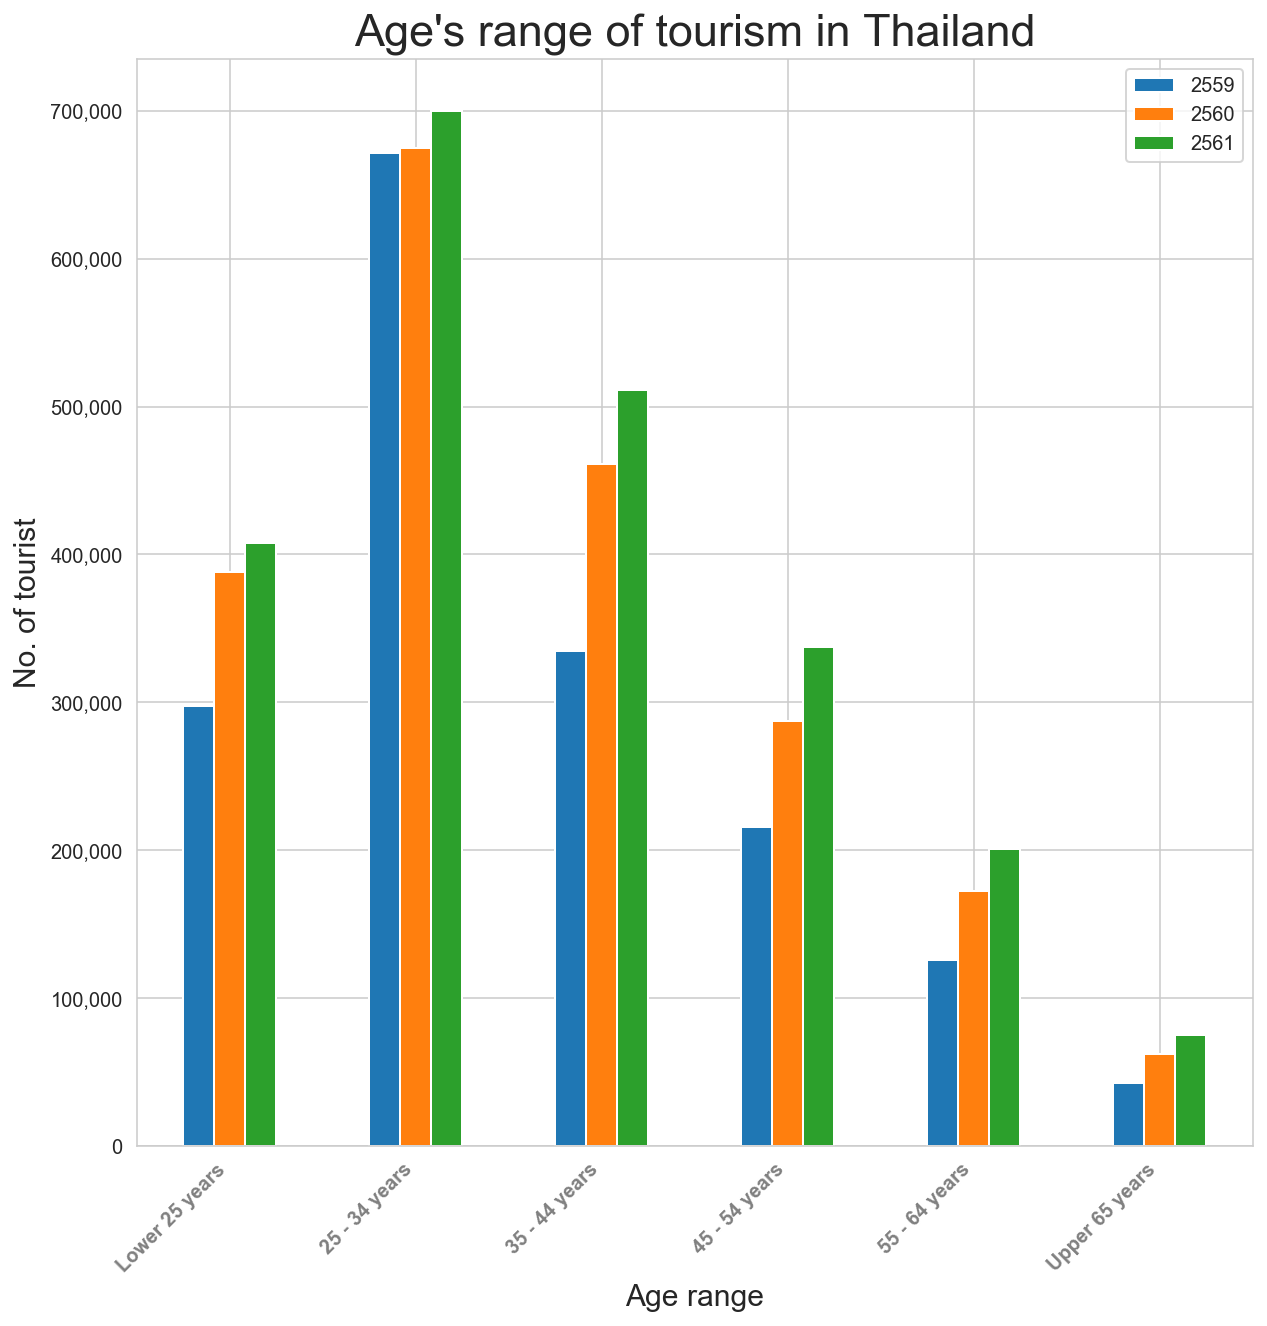

In [44]:
# รวมจำนวนนักท่องเที่ยวแบ่งตามอายุ
age_tourist_sum = age_tourist_g[['Age','2559','2560','2561']].groupby('Age').sum()

# เรียง index ใหม่
age_tourist_sum = age_tourist_sum.reindex(['Lower 25 years','25 - 34 years', '35 - 44 years'
                                           , '45 - 54 years', '55 - 64 years', 'Upper 65 years'])

age_tourist_graph = age_tourist_sum.plot.bar(figsize=(10,10));
set_name_title_x_y(age_tourist_graph,"Age's range of tourism in Thailand",'Age range','No. of tourist',15)
age_tourist_graph.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))  #การ format ตัวเลขแกน y

- เป็นกราฟแสดงข้อมูลอายุของนักท่องเที่ยว 5 ประเทศ เพื่อนำมาศึกษาพฤติกรรมโดยรวมของนักท่องเที่ยวว่าส่วนใหญ่อายุเท่าไหร่แล้วนำข้อมูลตรงนี้ไปจัดนโยบายที่สนับสนุนให้คนกลุ่มนั้นๆมาเพิ่มมากขึ้น เช่น ในช่วงอายุ 25-34ปี เราอาจจะจัดกิจกรรมที่มีการผจญภัย ในขณะที่ช่วงอายุ55-64อาจจะจัดให้เป็นชมบรรยกาศสวยๆมากกว่า เป็นต้น
- นอกจากนี้จะพบว่าในช่วงวัย 35-44 ปี และ 45-54 ปี นั้น ในช่วง 3 ปีที่ผ่านมา ยอดนักท่องเที่ยวในช่วงวัยดังกล่าวโตขึ้นอย่างมีนัยยะ สอดคล้องกับสถานการณ์สังคมผู้สูงอายุ ซึ่งเราสามารถนำข้อมูลในจุดนี้มาพัฒนาเพิ่มเติมในด้านโปรโมชั่น และการอำนวยความสะดวกแก่นั่งท่องเที่ยวเช่น แผนการท่องเที่ยวที่เหมาะสำหรับผู้สูงอายุ และการดีไซน์สถานที่ต่างๆให้อยู่ในรูปแบบ Universal Design


## Widgets กราฟแสดงช่วงอายุของนักท่องเที่ยวแต่ละประเทศ

In [45]:
age_each_country = widgets.Dropdown(options=age_tourist_g[age_tourist_g.Country.notna()]['Country'].sort_values().unique(),
                                     description='Country:',
                                     disabled=False,)
display(age_each_country)

Dropdown(description='Country:', options=('Bangladesh', 'Eastern Europe', 'Nepal', 'Russia', 'South Africa'), …

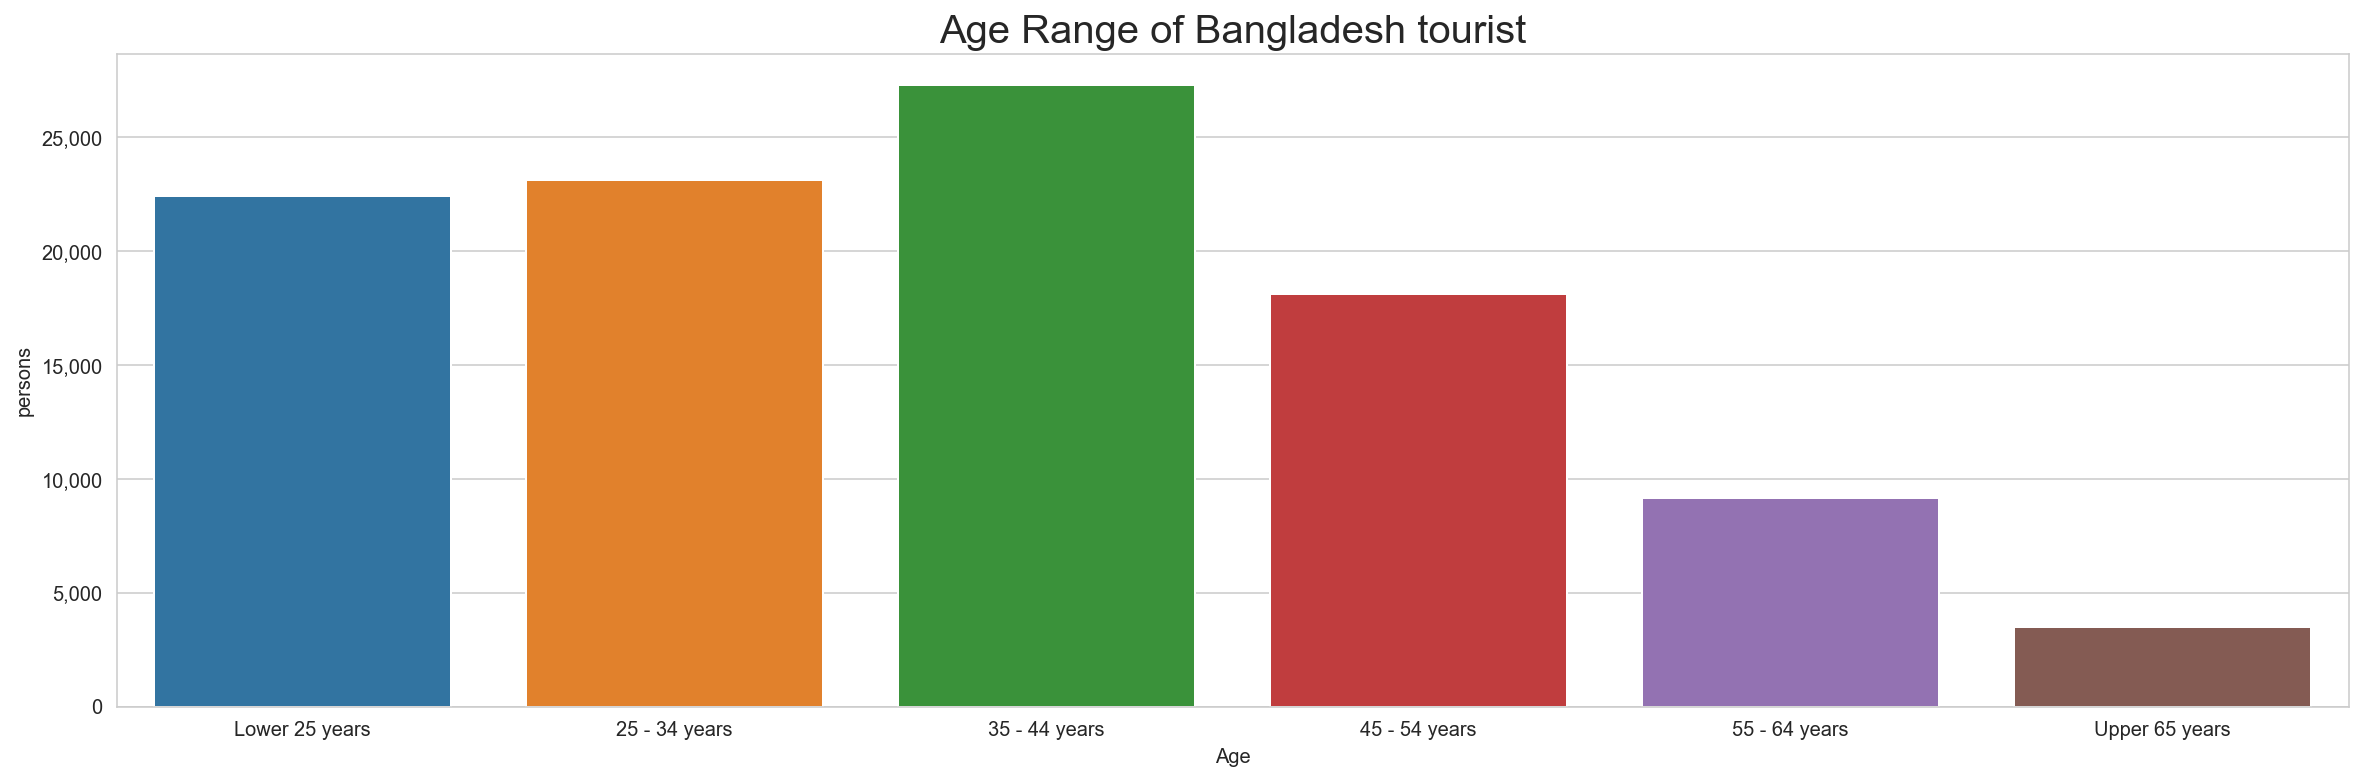

In [46]:
ag_visual = age_tourist_g.loc[age_tourist_g['Country'] == age_each_country.value].set_index('Country')
plt.figure(figsize=(20,6))
age_country = sns.barplot(x='Age', y='2559', data=ag_visual)
plt.xlabel('Age') 
plt.ylabel('persons') 
plt.title(f'Age Range of {age_each_country.value} tourist', fontsize = 20);
age_country.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))  #การ format ตัวเลขแกน y

ในกรณีที่เรามีงบไม่พอที่จะกระตุ้นนักท่องเที่ยง5 ประเทศ หรือต้องการจะเจาะเฉพาะกลุ่มนั้นๆไปเลย(เพราะแต่ละประเทศจะไม่เหมือนกัน) เราก็สามารถเข้าไปดูรายละเอียดพฤติกรรมแต่ประเทศได้ว่าแต่ล่ะช่วงอายุมาเที่ยวกันเท่าไหร่

# ข้อมูลนักท่องเที่ยวที่เดินทางมาประเทศไทยโดยเที่ยวด้วยตนเองและคณะทัวร์

In [47]:
self_travel = pd.read_csv('https://www.dropbox.com/s/193w3mo7i9edqm8/travel_by_self.csv?dl=1')
self_travel = self_travel.dropna().reset_index(drop=True)
# self_travel

In [48]:
tour_travel = pd.read_csv('https://www.dropbox.com/s/7a2n2bvjs7x0jz3/travel_with_tour.csv?dl=1')
tour_travel = tour_travel.dropna().reset_index(drop=True)
# tour_travel

# เปอร์เซนต์การเปลี่ยนแปลงของจำนวนนักท่องเที่ยวทั้ง2ลักษณะ เลือกตามประเทศที่กำหนด
- Russia, Eastern Europe, South Africa, Nepal, Bangladesh

In [49]:
# เดินทางด้วยตนเอง
select_byself_country = self_travel.loc[self_travel['Country'].isin(largest_growth_list)]
select_byself_country.drop(['Continent'],axis=1,inplace=True)
select_byself_country.set_index(select_byself_country.columns[0],inplace=True)
                           
# เดินทางกับกรุ๊ปทัวร์
select_with_tour_country = tour_travel.loc[tour_travel['Country'].isin(largest_growth_list)]
select_with_tour_country.drop(['Continent'],axis=1,inplace=True)
select_with_tour_country.set_index(select_with_tour_country.columns[0],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
# สร้างตารางอัตราการเปลี่ยนแปลงของจำนวนนักท่องเที่ยวตั้งแต่ปี 2016 ถึง 2018 (เดินทางด้วยตนเอง)
select_byself_country_chg=select_byself_country.pct_change(axis='columns',periods=2)
select_byself_country_chg.rename(columns={'2018':'percentage of change from 2016 to 2018 (byself)'},inplace=True)
select_byself_country_chg.drop(['2016','2017'],axis=1,inplace=True)
select_byself_country_chg

# สร้างตารางอัตราการเปลี่ยนแปลงของจำนวนนักท่องเที่ยวตั้งแต่ปี 2016 ถึง 2018 (เดินทางกับกรุ๊ปทัวร์)
select_with_tour_country_chg=select_with_tour_country.pct_change(axis='columns',periods=2)
select_with_tour_country_chg.rename(columns={'2018':'percentage of change from 2016 to 2018 (tour)'},inplace=True)
select_with_tour_country_chg.drop(['2016','2017'],axis=1,inplace=True)
select_with_tour_country_chg

# รวมตารางอัตราการเปลี่ยนแปลงของจำนวนนักท่องเที่ยวตั้งแต่ปี 2016 ถึง 2018 ของเดินทางด้วยตนเองและเดินทางกับกรุ๊ปทัวร์
pc_select_country_merge = pd.merge(select_byself_country_chg, select_with_tour_country_chg, on='Country')
# pc_select_country_merge

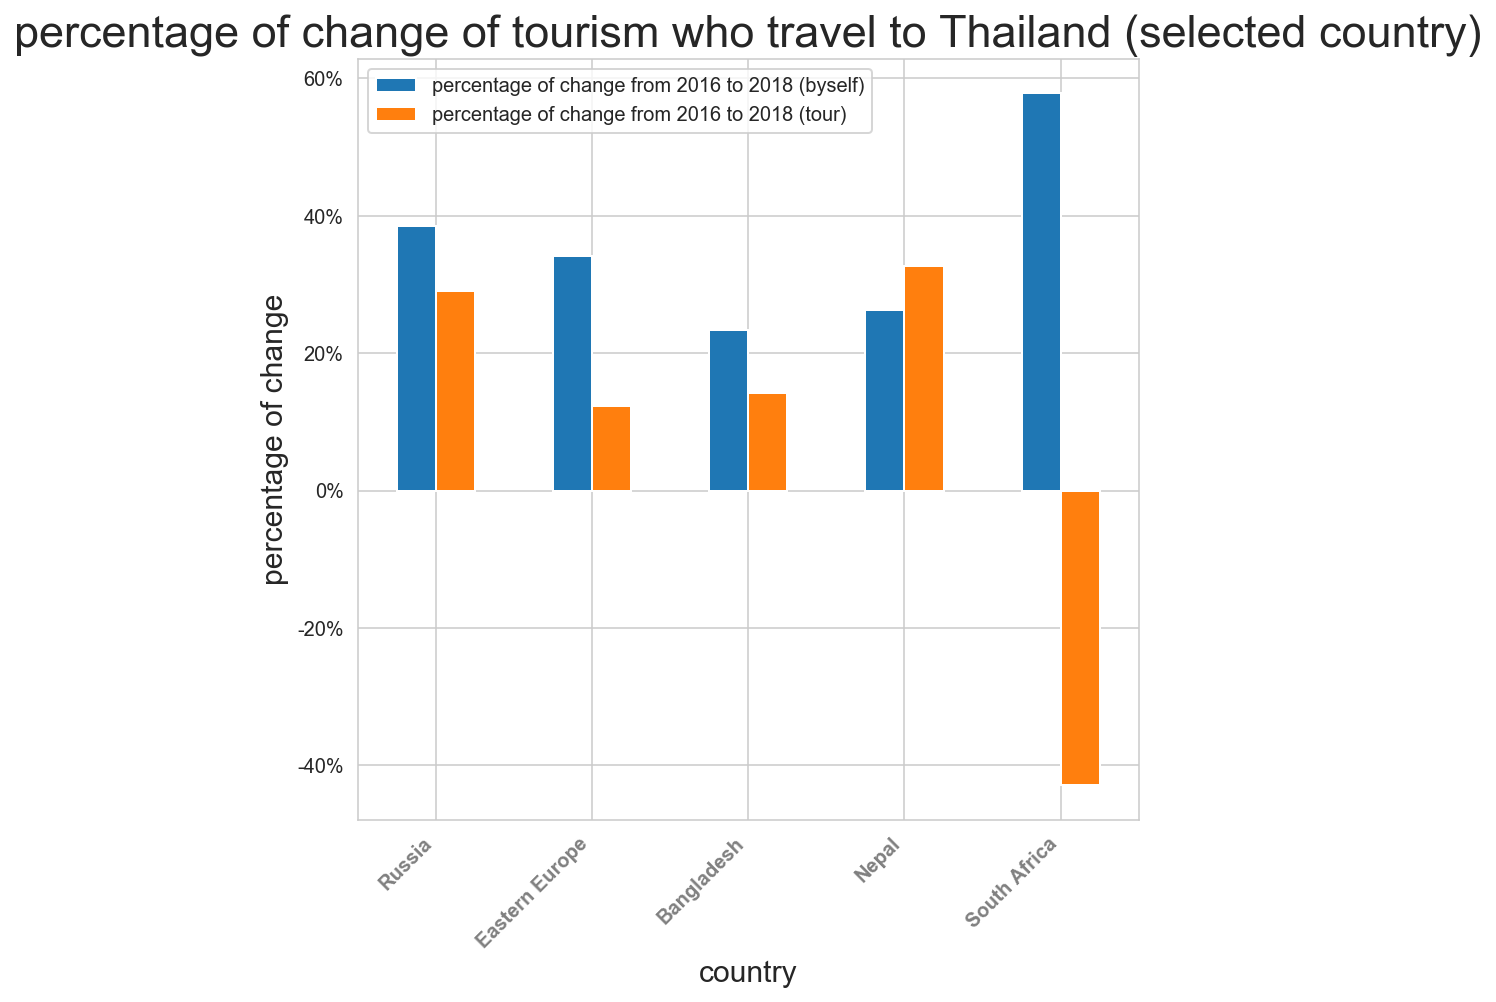

In [51]:
pc_select_country_merge2=pc_select_country_merge.plot(kind='bar',figsize=(7,7))
set_name_title_x_y(pc_select_country_merge2,'percentage of change of tourism who travel to Thailand (selected country)',"country","percentage of change",15)
pc_select_country_merge2.yaxis.set_major_formatter(FuncFormatter(lambda v, p: "{:,.0f}%".format(v * 100)));

จากกราฟ percentage of change of tourism who travel to Thailand (selected country) แสดงให้เห็นว่านักท่องเที่ยวส่วนมากเดินทางท่องเที่ยวในประเทศไทยโดยท่องเที่ยวด้วยตนเองมากขึ้น แต่มีเพียงประเทศNepal เท่านั้นที่มีอัตรานักท่องเที่ยวด้วยตนเองเพิ่มขึ้นน้อยกว่าการเดินทางท่องเที่ยวกับกรุ๊ปทัวร์

- ประเทศที่จำนวนนักท่องเที่ยวที่เดินทางด้วยตนเองมีอัตราเพิ่มขึ้นมากกว่านักท่องเที่ยวที่เดินทางกับกรุ๊ปทัวร์ : Russia, Eastern Europe, Bangladesh, South Africa
- ประเทศที่จำนวนนักท่องเที่ยวที่เดินทางกับกรุ๊ปทัวร์มีอัตราเพิ่มขึ้นมากกว่านักท่องเที่ยวที่เดินทางด้วยตนเอง : Nepal

ดังนั้น หากต้องการเพิ่มจำนวนนักท่องเที่ยวใน5ประเทศดังกล่าว จะสามารถแบ่งออกได้เป็น2วิธี ดังนี้
- 1. Russia, Eastern Europe, Bangladesh, South Africa : สนับสนุนและให้ข้อมูล เกี่ยวกับการเดินทางท่องเที่ยวในประเทศไทย เช่น ทำคลิปวิดีโอโปรโมทสถานที่ท่องเที่ยวในประเทศไทยเป็นภาษาท้องถิ่นของประเทศนั้นๆ
- 2. Nepal : ออกมาตรการสนับสนุนบริษัททัวร์จากประเทศเนปาล ที่มาท่องเที่ยวประเทศไทย เช่น ลดราคาในช่วง low season, ลดราคาร้านอาหารสำหรับคณะทัวร์

# ดูพฤติกรรมของนักท่องเที่ยวที่เข้ามาในไทยว่าชอบพักที่พักรูปแบบไหน
- ดึงข้อมูลของนักท่องเที่ยวที่เข้ามาในไทยว่าชอบพักที่พักรูปแบบไหนเพื่อสนับสนุนให้ที่พักนั้นๆดีขึ้นและทำให้นักท่องเที่ยวอยากมามากขึ้น

In [52]:
# ดึงข้อมูลการพักอาศัยของนักท่องเที่ยว 
Acc_tourist = pd.read_excel('https://www.dropbox.com/s/z1myhyno6lookg0/where_stay_2.xlsx?dl=1',skiprows=3)
Acc_tourist = Acc_tourist[:-2] 
Acc_tourist = Acc_tourist.dropna(axis = 1)  # drop column ที่เป็นค่า NaN

# ดึงข้อมูลมาแค่ประเทศที่มีค่าอัตราการนักท่องเที่ยวสูงที่สุด และ ตัดข้อมูลที่เป็น total ออก
rest_type_all = Acc_tourist[Acc_tourist['Accommodation'] != 'Total'].loc[Acc_tourist['Country'].isin(largest_growth_list)]

# rest_type_all

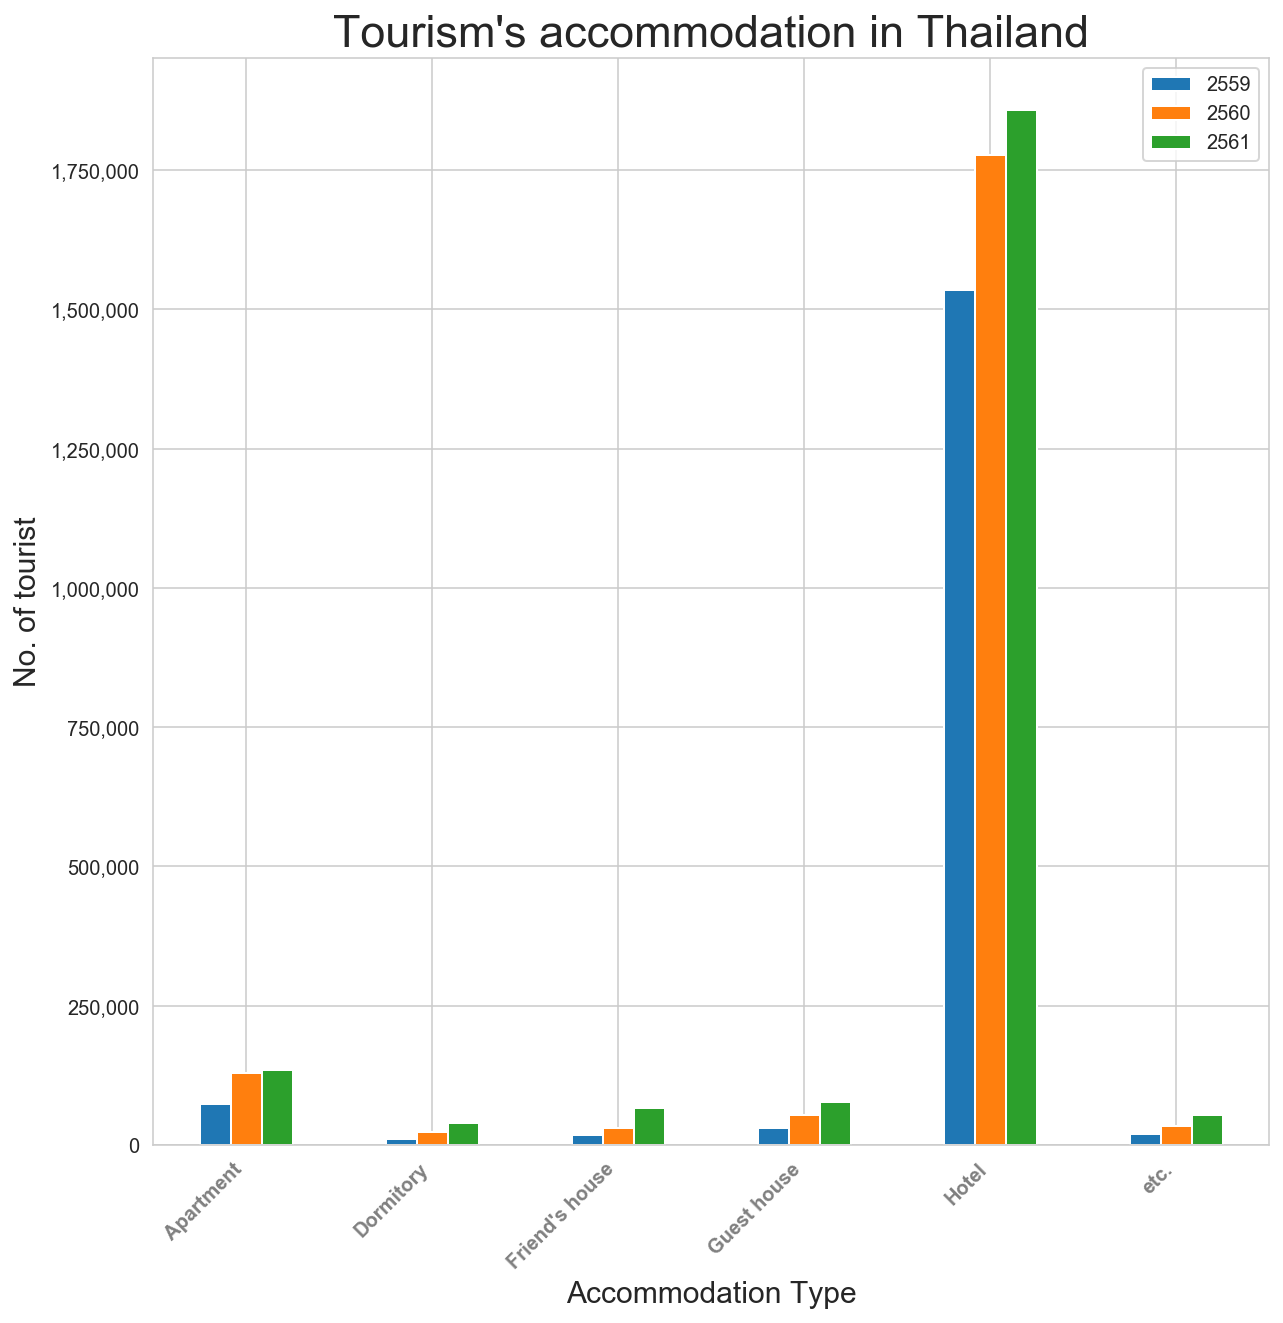

In [53]:
# รวมจำนวนนักท่องเที่ยวแบ่งตามอายุ
rest_type_all_sum = rest_type_all[['Accommodation','2559','2560','2561']].groupby('Accommodation').sum()


rest_type_all_graph = rest_type_all_sum.plot.bar(figsize=(10,10));
set_name_title_x_y(rest_type_all_graph,"Tourism's accommodation in Thailand",'Accommodation Type','No. of tourist',15)
rest_type_all_graph.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))  #การ format ตัวเลขแกน y

กราฟแสดงข้อมูลพฤติกรรมการพักที่พักของนักท่องเที่ยว 5 ประเทศโดยรวม เพื่อมาศึกษาว่านักท่องเที่ยวส่วนใหญ่ชอบเข้าที่พักแบบใด เพื่อที่จะสามารถสนับสนุนให้มาตรฐานดียิ่งขึ่น ส่งผลให้นักท่องเที่ยวประทับใจแล้วอยากลับมาอีก 

โดยจะเห็นได้ว่ารวมทุกประเทศแล้ว โรงแรมจะมีค่าสูงเกือบทั้งหมดของจำนวนคนเข้ามาพักที่พักในเมืองไทย เนื่องจากโรงแรมนั้นมีมาตรฐานที่ดีและปลอดภัยอยู่แล้ว แต่จากกราฟรูปแบบการท่องเที่ยวเราเห็นได้ว่าคนที่เข้ามาเที่ยวโดยมาด้วยตัวเองค่อนข้างจะเยอะเช่นกัน ดังนั้นในบางทีเราอาจจะหันไปสนับสนุน ที่พักในรูปแบบอื่น เช่น ความสะดวกในการเดินทาง หรือความปลอดภัย เพื่อทำให้เกิดการกระจายรายได้มากขึ้นก็ได้


## กราฟลักษณะที่พักแบ่งตามลักษณะที่พักของนักท่องเที่ยวแต่ละประเทศ

In [54]:
matter_rest_type = ["Friend's house",'Guest house','Dormitory','Apartment','etc.']
rest_type_ht = Acc_tourist.loc[Acc_tourist['Country'].isin(largest_growth_list)]
rest_type = rest_type_ht.loc[Acc_tourist['Accommodation'].isin(matter_rest_type)]

def Accom_Country (Country):
    for i in Country:
        A = pd.melt(rest_type_ht.loc[rest_type_ht['Country'] == i], id_vars=['Country','Accommodation'], value_vars=['2559','2560', '2561'],var_name='Year',value_name='No_traveler')
        A = A.pivot_table(index='Year',columns='Accommodation',values='No_traveler')
        A.plot.bar(figsize=(10,5), title=i)

In [55]:
# Widget เลือกประเทศ 
rest_each_country = widgets.Dropdown(options=rest_type[rest_type.Country.notna()]['Country'].sort_values().unique(),
                                     description='Country:',
                                     disabled=False,)
display(rest_each_country)

Dropdown(description='Country:', options=('Bangladesh', 'Eastern Europe', 'Nepal', 'Russia', 'South Africa'), …

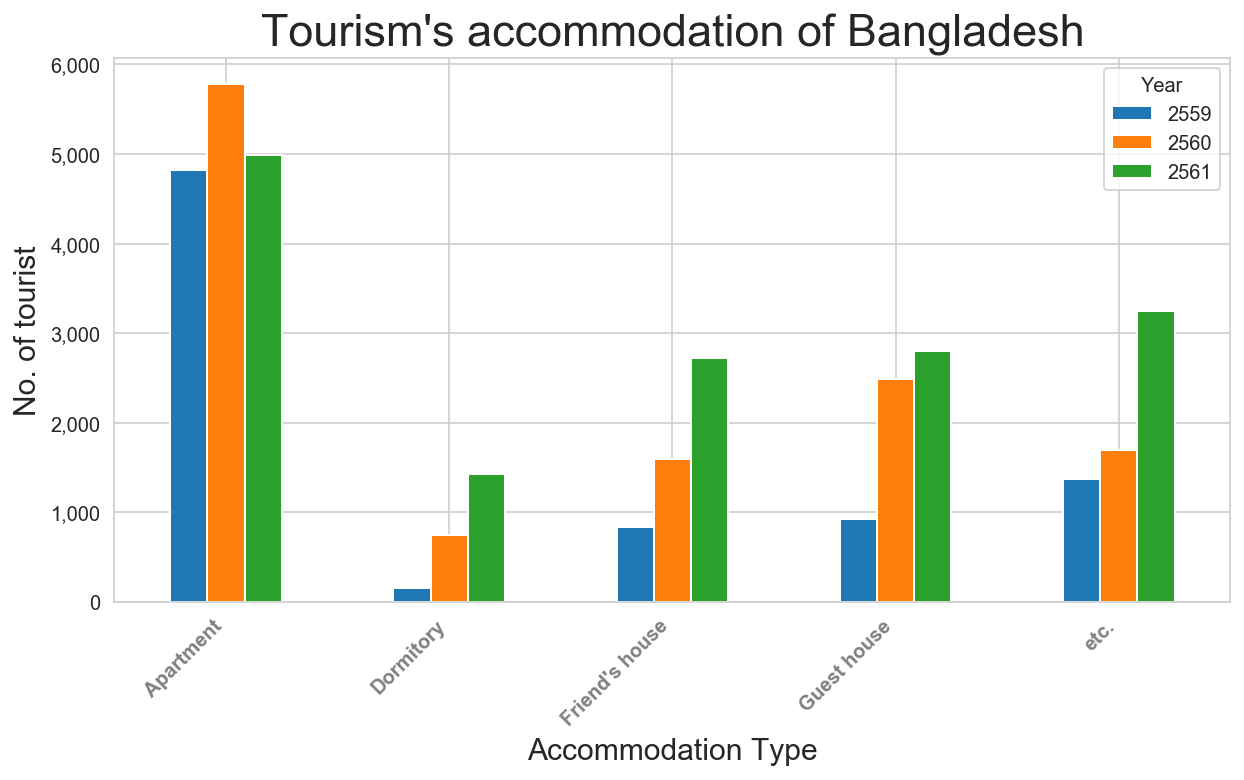

In [56]:
Acc_each_country = pd.melt(rest_type.loc[rest_type['Country']==rest_each_country.value], id_vars=['Country','Accommodation'], value_vars=['2559','2560', '2561'],var_name='Year',value_name='No_traveler')
Acc_each_country = Acc_each_country.pivot_table(index='Accommodation',columns='Year',values='No_traveler')


Acc_each_country_graph = Acc_each_country.plot.bar(figsize=(10,5), title=rest_each_country.value);
set_name_title_x_y(Acc_each_country_graph,f"Tourism's accommodation of {rest_each_country.value}",'Accommodation Type','No. of tourist',15)
Acc_each_country_graph.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))  #การ format ตัวเลขแกน y

จากกราฟแยกตามประเทศแบบตัดตัวเลือกโรงแรมออก จะเห็นได้ว่าในทุกๆประเทศการเติบโตของที่พัก แบบ etc. มีการเติบโตแบบก้าวกระโดด ซึ่งรูปแบบที่พักในหมวดนี้คือห้องพักแบบ โฮสเทล และ Air bnb ซึ่งสอดคล้องกับข้อมูลรูปแบบการท่องเที่ยวในข้างต้นที่มีการท่องเที่ยวด้วยตัวเองมากขึ้น ลักษณะที่พักอย่าง โฮสเทล และ Air bnb จึงได้รับความนิยมเนื่องจากราคาที่ถูกและในหลายๆที่อยู่ใกล้แหล่งท่องเที่ยวหรือบริการขนส่งสาธารณะที่ทำให้ง่ายต่อการท่องเที่ยว

# บทสรุป

สืบเนื่องมาจากสิ่งที่รัฐบาลพูดไว้ว่า 

>" ประเทศไทยรายได้หลักนักท่องเที่ยวมาจากจีน เราจึงต้องสนิทและคอยอำนวยความสะดวกให้เขามากกว่าประเทศอื่นๆ "

กลุ่มผู้จัดทำเลยเกิดข้อสงสัยที่ว่า

> เราควรพึ่งพาแต่นักท่องเที่ยวชาวจีนอย่างนี้ตลอดไปหรือไม่ และในความเป็นจริงๆนั้นนักท่องเที่ยวชาวจีนมีัศักยภาพจริงหรือไม่

ซึ่งจากการสืบค้นข้อมูลและวิเคราะห์แล้วเราพบว่า การที่รายรับจากนักท่องเที่ยวจีนสูงนั้น เป็นผลมาจากจำนวนนักท่องเที่ยวที่สูงเช่นกัน ดังนั้นเราจึงเกิดคำถามต่อว่า

> แล้วถ้าวันนึงนักท่องเที่ยวจีนลดลงหล่ะ จะส่งผลกระทบใดต่อประเทศไทย

ทางกลุ่มผู้จัดทำจึงนำกราฟลักษณะของหุ้นสามสายการบินหลักของประเทศไทยอย่าง "การบินไทย", "นกแอร์" และ "แอร์เอเชีย" มาดูเปรียบเทียบกันและพบว่าทั้งสามสายการบินนั้น ราคาหุ้น ณ เวลาปิดตกลงไปในทิศทางเดียวในระยะเวลาที่เป็นผลกระทบจากประเทศจีน และอีกหนึ่งตัวอย่างที่เห็นชัดคือ ประเทศเกาหลีที่นักท่องเที่ยวชาวจีนมากเป็นอันดับหนึ่งเช่นเดียวกับไทย ที่ในปี 2017 ได้เกิดข้อพิพาทกับประเทศจีนขึ้นซึ่งส่งผลกระทบต่อยอดนักท่องเที่ยวที่ เช่นเดียวกับรายรับจากนักท่องเที่ยว ที่ตกฮวบอย่างเห็นได้ชัด ทางกลุ่มผู้จัดทำจึงมีความคิดเห็นว่า แม้รายรับจะนักท่องเที่ยวจีนจะสูงเป็นที่น่าพอใจ แต่อย่างไรก็ตาม ประเทศไทยควรมีนักท่องเที่ยวจากกลุ่มประเทศอื่นเพิ่มขึ้นเช่นเดียวกันเพื่อป้องกันเหตุไม่คาดฝันเช่นเกาหลี จึงเกิดเป็นคำถามที่ว่า

> แล้วนอกจากจีน เราควรโฟกัสนักท่องเที่ยวจากประเทศไหนดี

หลังจากกลุ่มผู้จัดทำได้หาค่าใช้จ่ายต่อหัวของนักท่องเที่ยวทุกประเทศแล้วพบว่า นักท่องเที่ยวชาวจีนมีค่าใช้จ่ายต่อหัวอยู่ในระดับกลางเท่านั้น และยังมีอีกถึง 37 ประเทศที่มีค่าใช้จ่ายต่อหัวมากกว่าจีน ทางกลุ่มผู้จัดทำจึงคัดเลือก 5 ประเทศที่มีอัตราการเติบโตของนักท่องเที่ยวมากที่สุดจากกลุ่ม 37 ประเทศที่มีค่าใช้จ่ายต่อหัวมากกว่านักท่องเที่ยวชาวจีนซึ่งก็คือประเทศ

- รัสเซีย
- เนปาล
- ยุโรปตะวันออก
- บังคลาเทศ
- แอฟริกาใต้

และเมื่อได้รายชื่อทั้ง 5 ประเทศมาแล้วนั้น ทางกลุ่มผู้จัดทำจึงนำมาวิเคราะห์เพื่อหาพฤติกรรมของนักท่องเที่ยวในชาตินั้นๆเพื่อที่ในการสานต่อนโยบายจะสามารถทำได้อย่างเหมาะสม และสามารถสรุปพฤติกรรมได้ดังนี้

- กลุ่มนักท่องเที่ยวที่ควรโฟกัสเป็นหลักคือนักท่องเที่ยวช่วงอายุ 25-34 ปี แต่อีกหนึ่งกลุ่มที่น่าสนใจและอาจกลายมาเป็นนักท่องเที่ยวกลุ่มสำคัญในอนาคตคือนักท่องเที่ยวในช่วงวัย 35-54 ปี อันเป็นผลต่อเนื่องจากสถานการณ์สังคมสูงอายุ
- ลักษณะการท่องเที่ยวที่น่าสนใจและมีการเติบโตคือการท่องเที่ยวด้วยตนเอง เนื่องจากในปัจจุบันสิ่งอำนวยความสะดวกในการท่องเที่ยวด้วยตนเองมีมากขึ้น อย่างเช่น Google Map, Google Translate, Grab ซึ่งรัฐบาลสามารถพัฒนาได้ด้วยการออกแอพลิเคชั่นที่ช่วยให้นักท่องเที่ยวเดินทางได้ง่ายขึ้น พัฒนาระบบขนส่งสาธารณะให้สะอาด ปลอดภัย และมีภาษาอังกฤษเป็นส่วนประกอบ
- แม้ว่ารูปแบบที่พักยอดนิยมจะเป็น โรงแรม แต่การเติบโตของที่พักรูปแบบต่างๆก็น่าสนใจ โดยเฉพาะการเติบโตของที่พักแบบ etc. ที่มี โฮสเทล และ Air bnb เป็นส่วนหนึ่ง การเติบโตของที่พักรูปแบบนี้โตแบบก้าวกระโดด ซึ่งสอดคล้องกับการเติบโตของการท่องเที่ยวด้วยตัวเอง รัฐบาลสามารถสนับสนุนได้โดยการผลักดันที่พักอย่าง Air bnb ให้ถูกกฎหมาย เพื่อที่จะเป็นการกระจายรายได้ และทำให้นักท่องเที่ยวได้ใกล้ชิดชุมชนมากขึ้น แต่อย่างไรก็ตามควรมีตรวจสอบความปลอดภัย และความเรียบร้อยอยู่เสมอ


# อ้างอิง
- จำนวนนักท่องเที่ยว,อายุ,ประเภทที่พักและรายได้จากนักท่องเที่ยวในไทย http://statbbi.nso.go.th/staticreport/page/sector/th/17.aspx
- การบินไทย https://www.set.or.th/set/historicaltrading.do?symbol=THAI&page=1&language=en&country=US&type=trading
- แอร์เอเชีย https://www.set.or.th/set/historicaltrading.do?symbol=AAV&page=2&language=en&country=US&type=trading
- นกแอร์ https://www.set.or.th/set/historicaltrading.do?symbol=NOK&page=0&language=en&country=US&type=trading
- YUAN Currency https://www.macrotrends.net/2575/us-dollar-yuan-exchange-rate-historical-chart
- จำนวนนักท่องเที่ยวในเกาหลี 'https://en.wikipedia.org/wiki/Tourism_in_South_Korea'
- รายได้จากนักท่องเที่ยวในเกาหลี https://kto.visitkorea.or.kr/eng/tourismStatics/keyFacts/KoreaMonthlyStatistics/eng/inout/inout.kto